<a href="https://colab.research.google.com/github/CarlosBaez11/RetoTecnologico-Eafit/blob/main/Copia_de_ProyectoTecnologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 38.9 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/CarlosBaez11/RetoTecnologico-Eafit.git

Cloning into 'RetoTecnologico-Eafit'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 80 (delta 1), reused 5 (delta 1), pack-reused 73
Receiving objects: 100% (80/80), 60.93 MiB | 23.33 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [46]:
data=pd.read_excel("/content/RetoTecnologico-Eafit/Caso 01 - Cobranza Sector Financiero.xlsx")

In [60]:
data.head(5)

,Consecutivo Documento Deudor,Nit,Nombres,Numero Documento,Tipo De Producto,PRODUCTO,Valor Obligacion,Valor Vencido,Regional,REGION,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,28768192,18,NaN,NaN,3,TARJETAS DE CREDITO,5637605.0,152093.0,2099,BOGOTA,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CALAMIDAD,2,1978-12-06,5637605.0,1 a 15,NaN,SIN PROFESION,SIN OFICIO
1,2712044,22,NaN,NaN,5,CONSUMO,40584.0,40584.0,2099,BOGOTA,...,1,SIN CUADRANTE,SIN CAUSAL DE MORA,3,2015-03-11,40584.0,<1M,NaN,SIN PROFESION,SIN OFICIO
2,13587837,23,NaN,NaN,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,1 a 15,NaN,SIN PROFESION,JUBILADO
3,23479925,46,NaN,NaN,3,TARJETAS DE CREDITO,5904653.0,1455631.0,2099,BOGOTA,...,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,1990-09-01,5904653.0,1 a 15,NaN,SIN PROFESION,SIN OFICIO
4,2712382,92,NaN,NaN,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,1 a 15,AGROPECUARIO,AGRICULTOR,TAXISTA


In [53]:
my_report=sv.analyze(V_categ)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



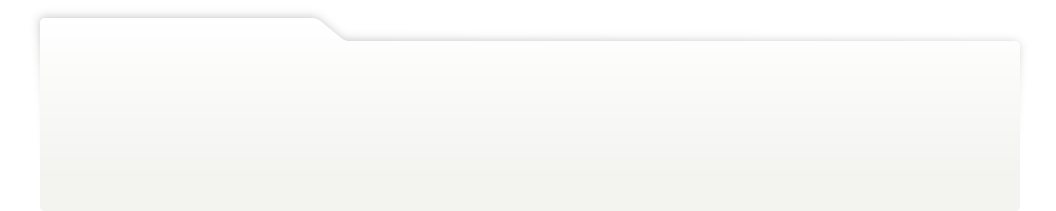
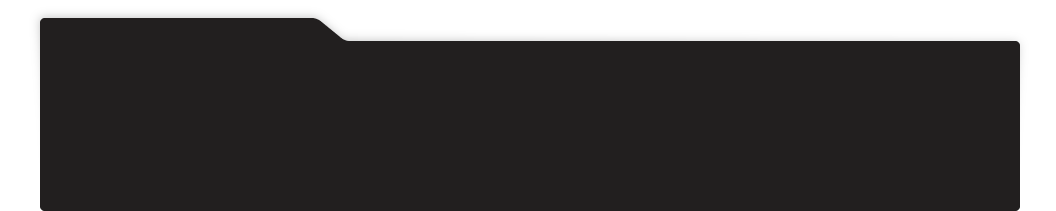
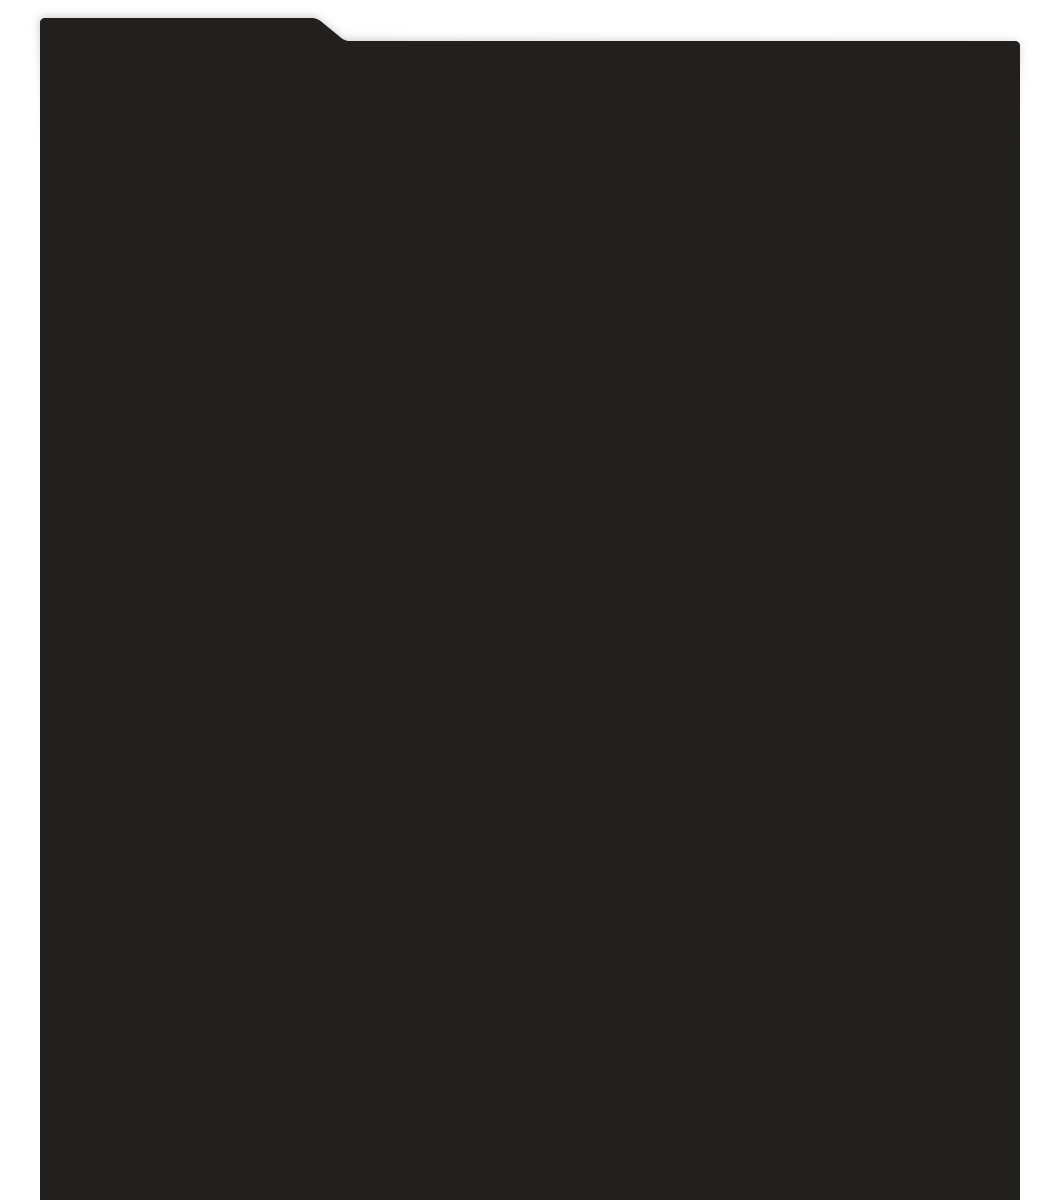
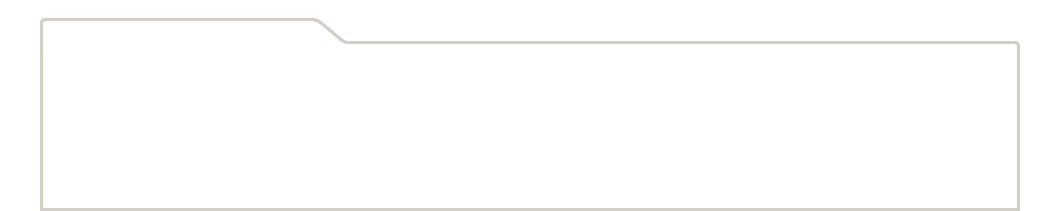
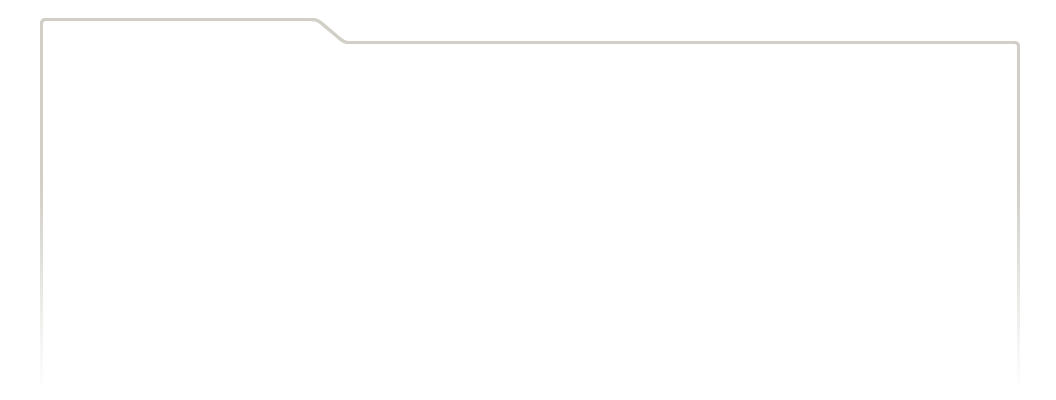
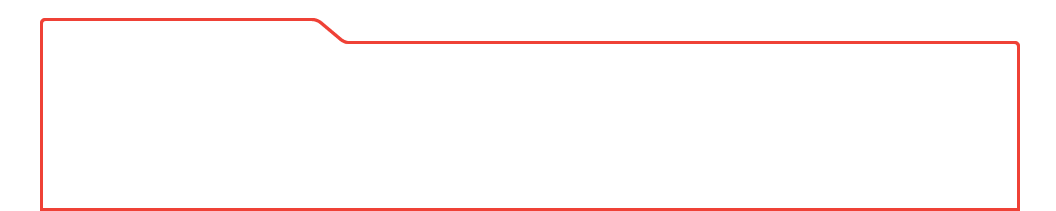
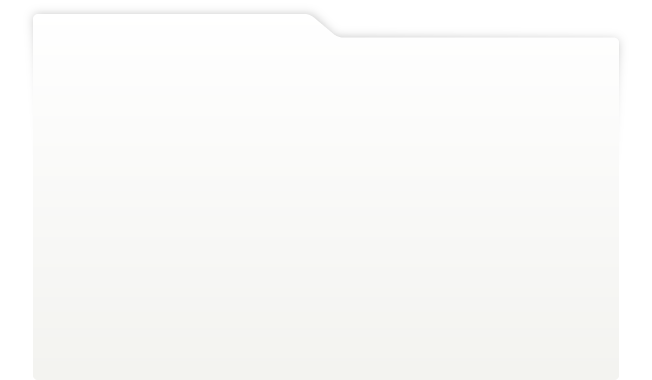
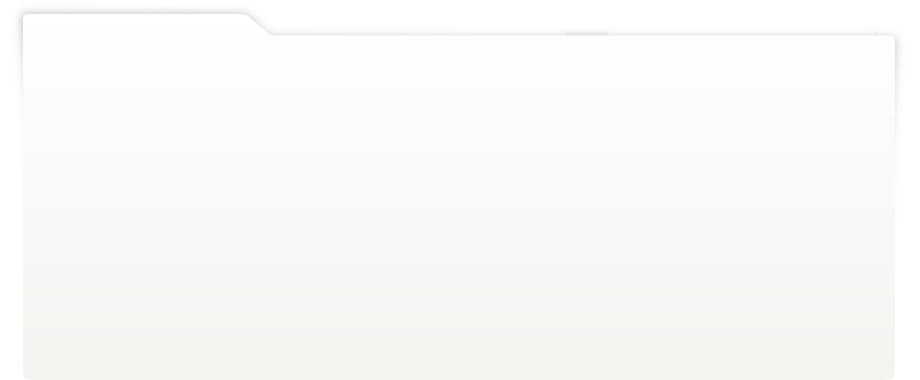
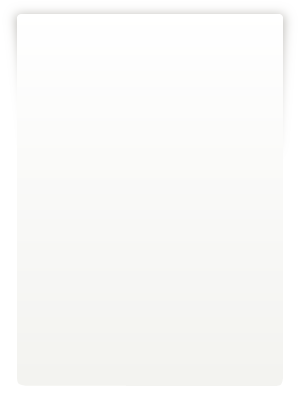
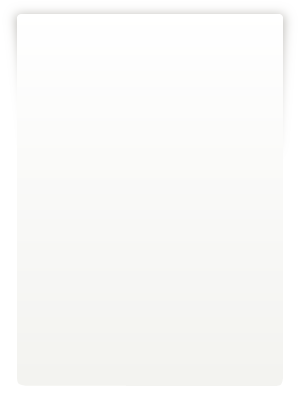
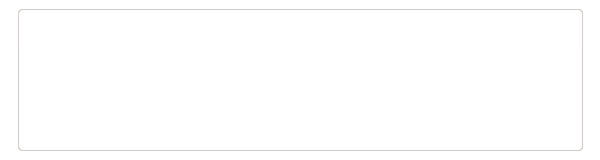
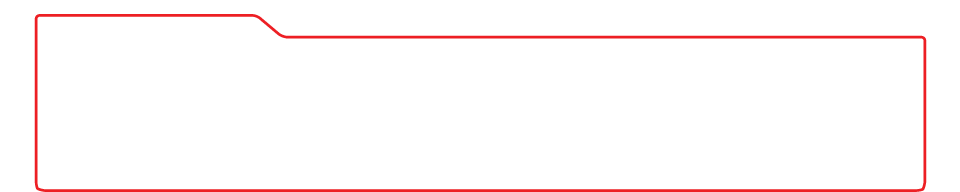
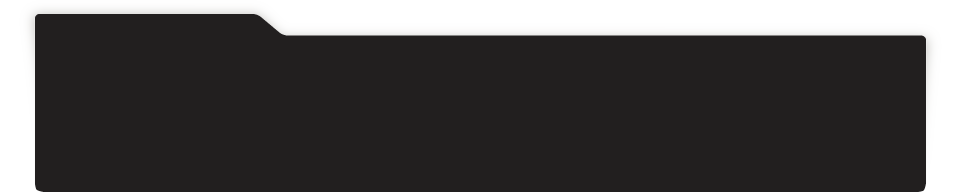
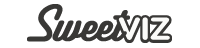
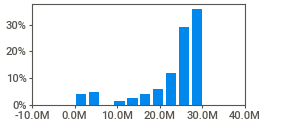
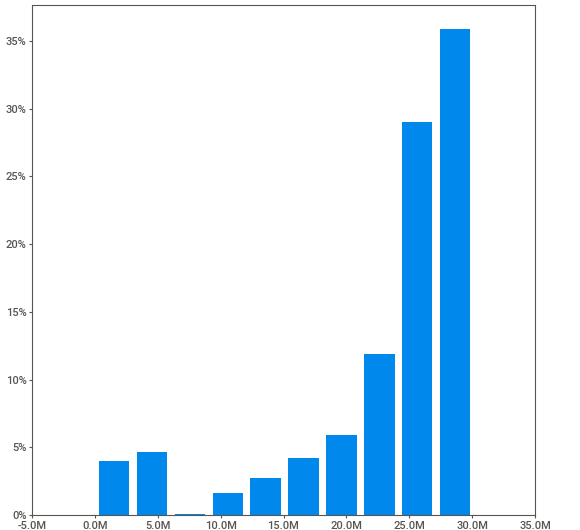
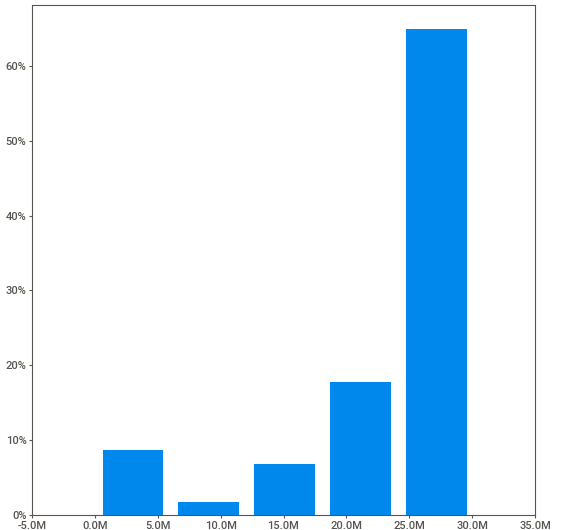
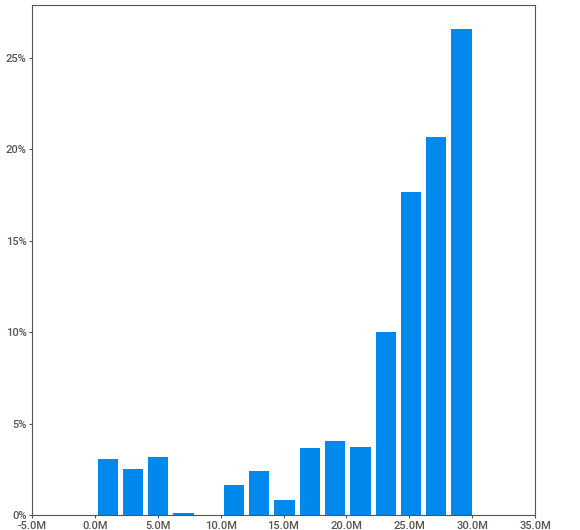
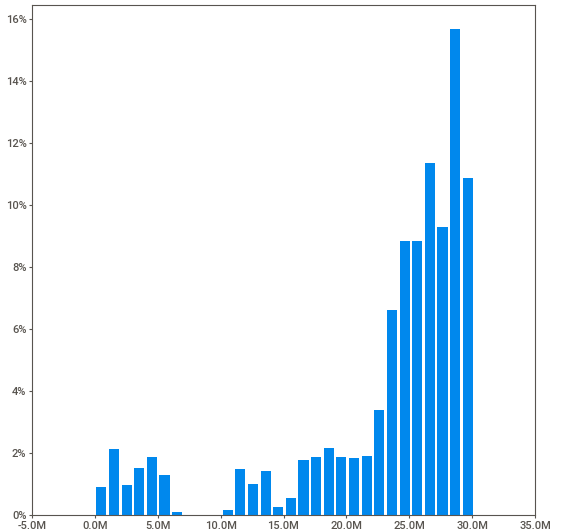
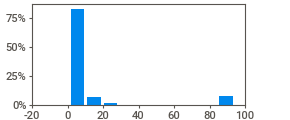
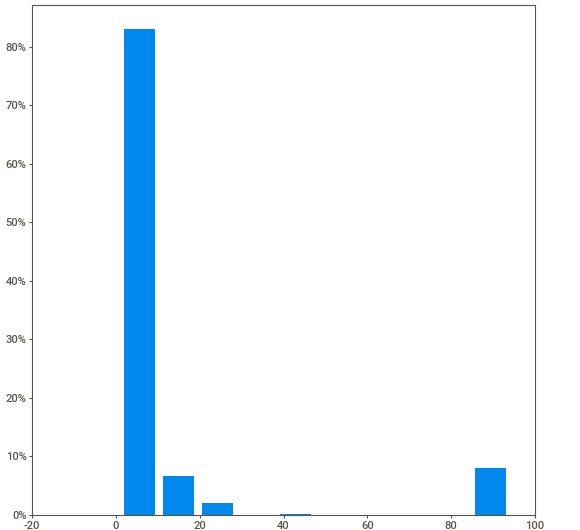
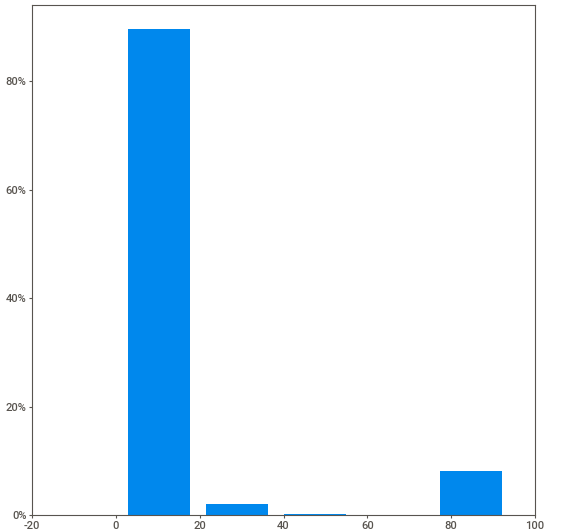
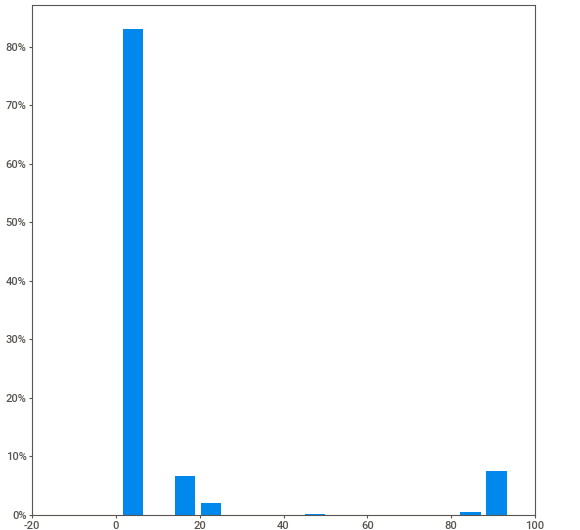
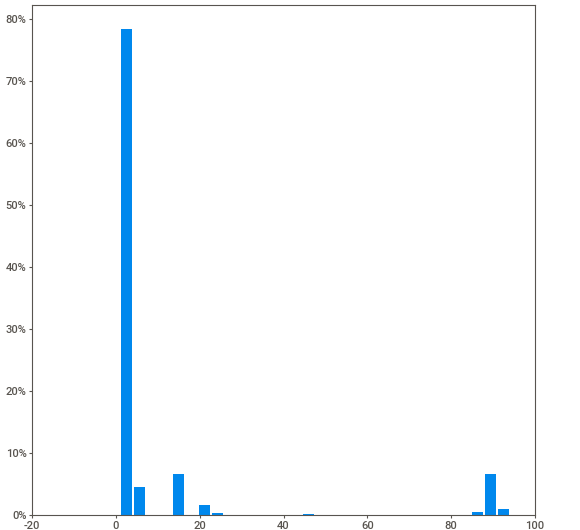
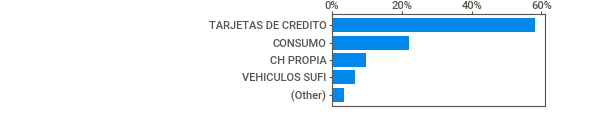
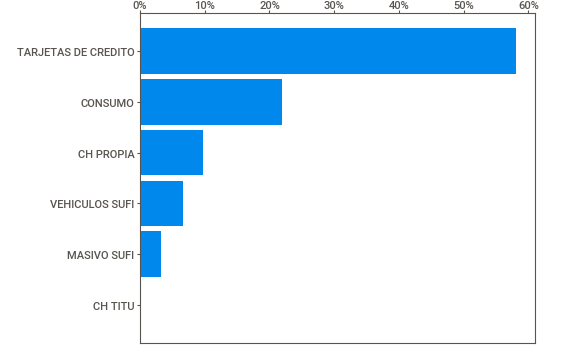
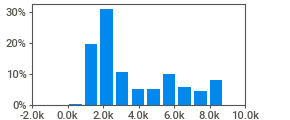
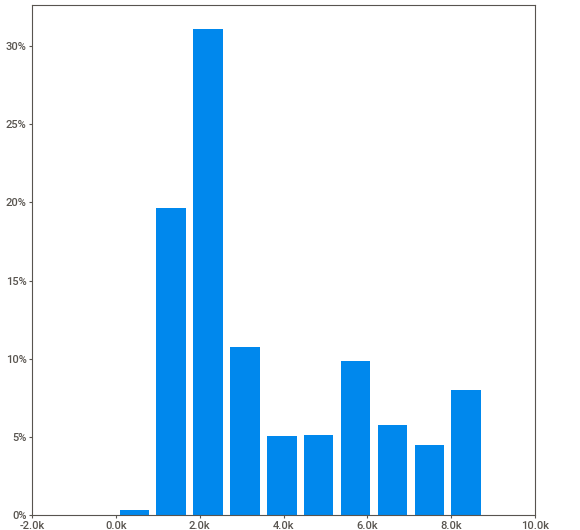
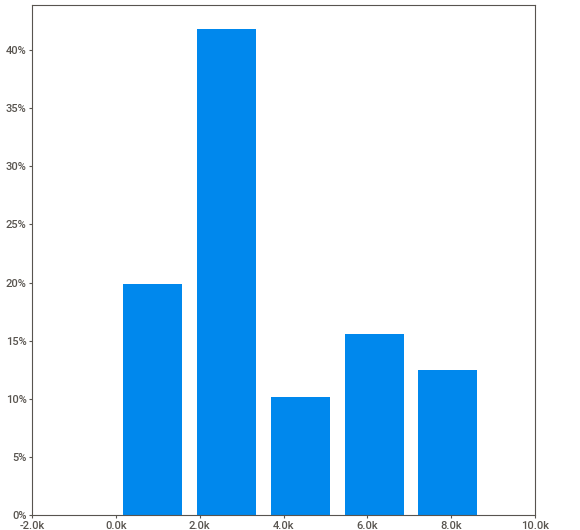
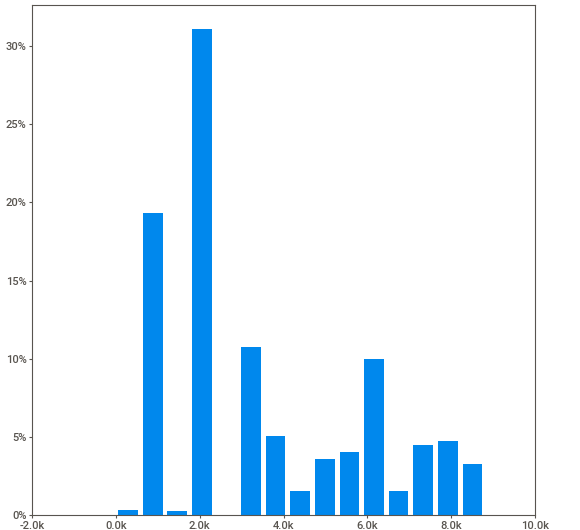
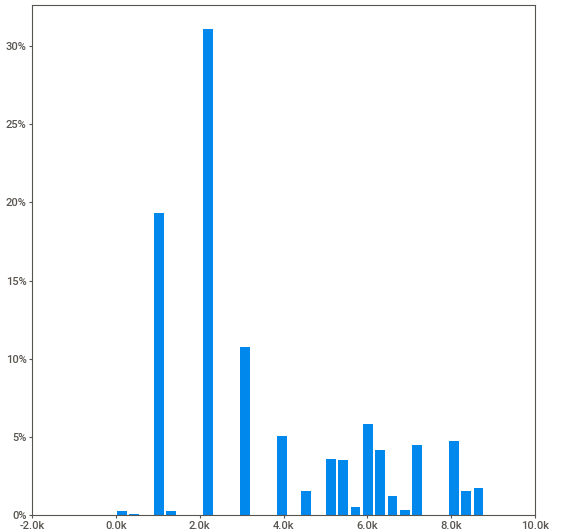
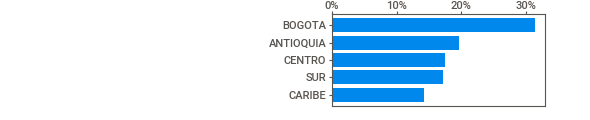
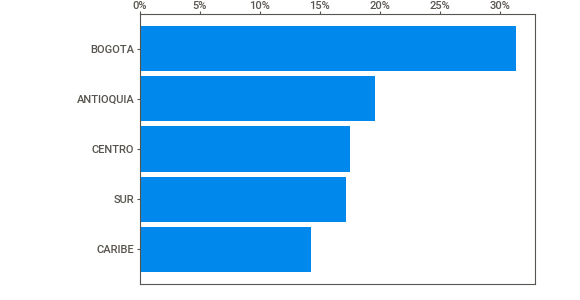
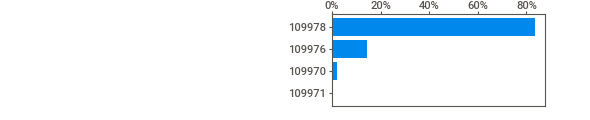
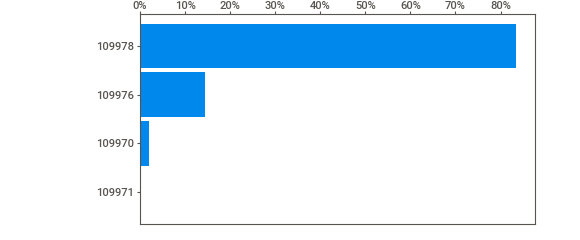
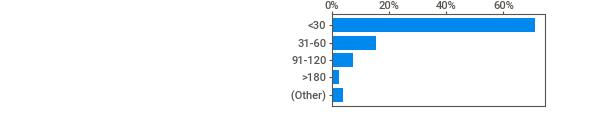
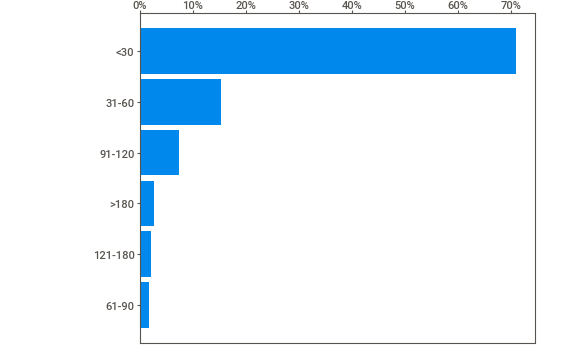
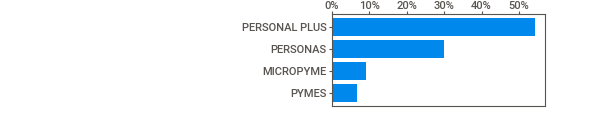
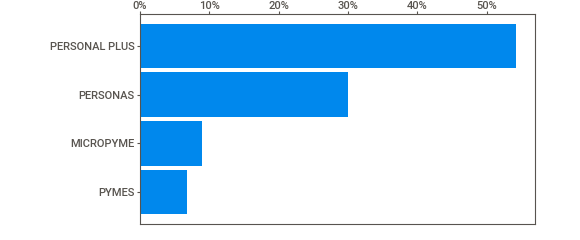
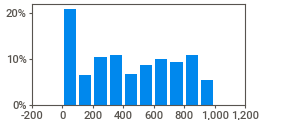
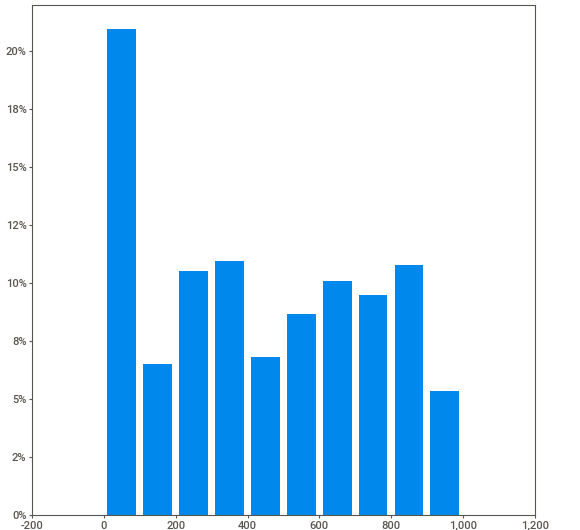
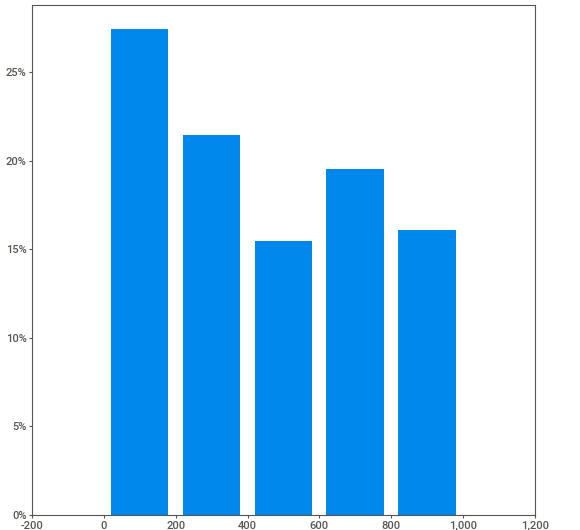
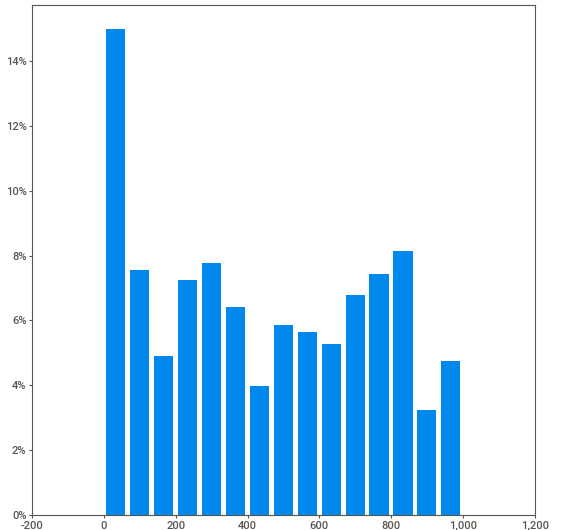
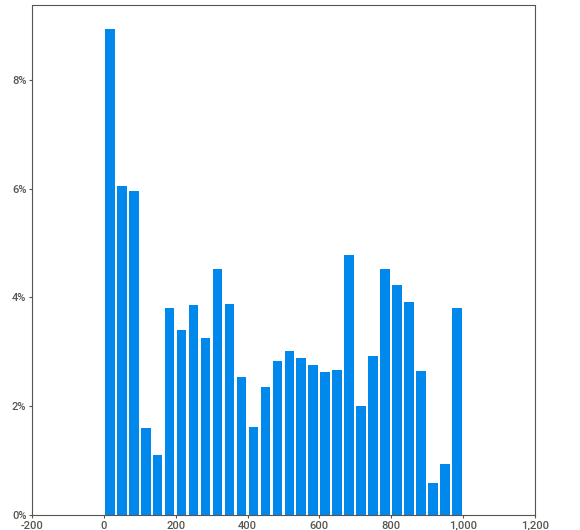
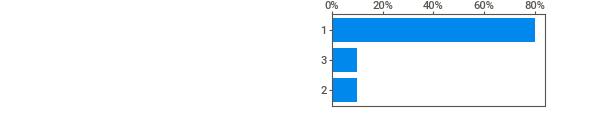
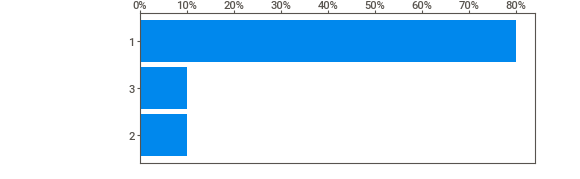
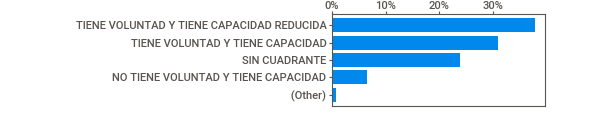
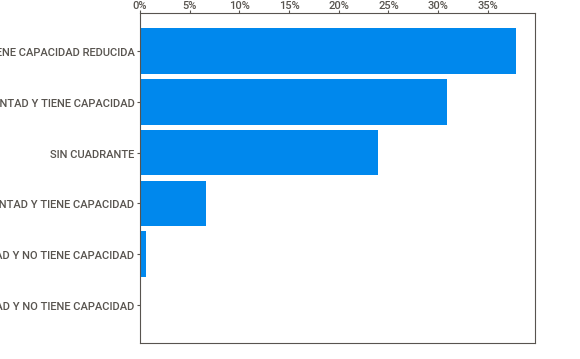
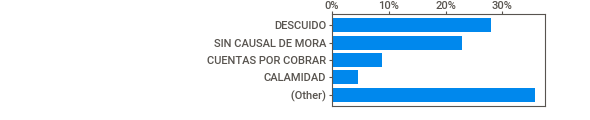
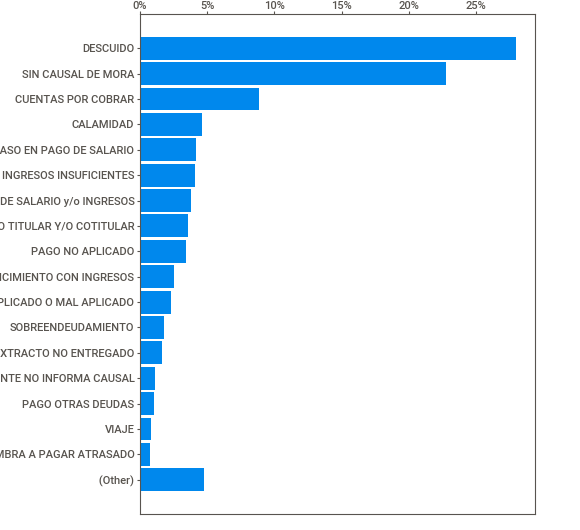
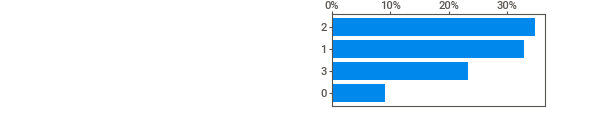
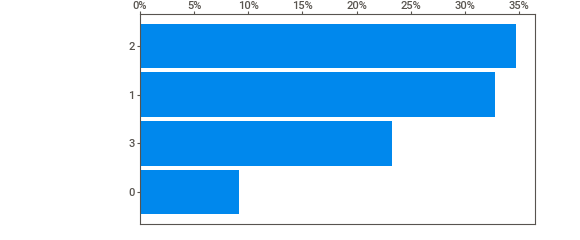
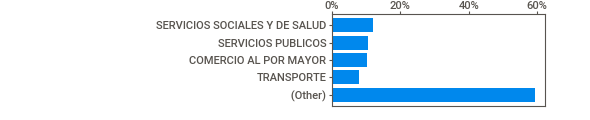
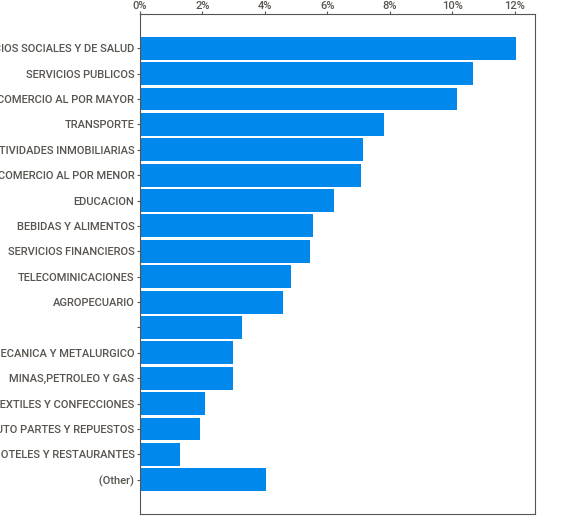
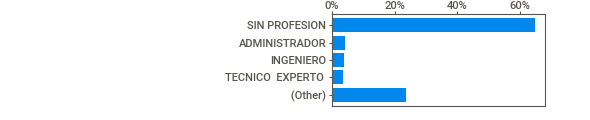
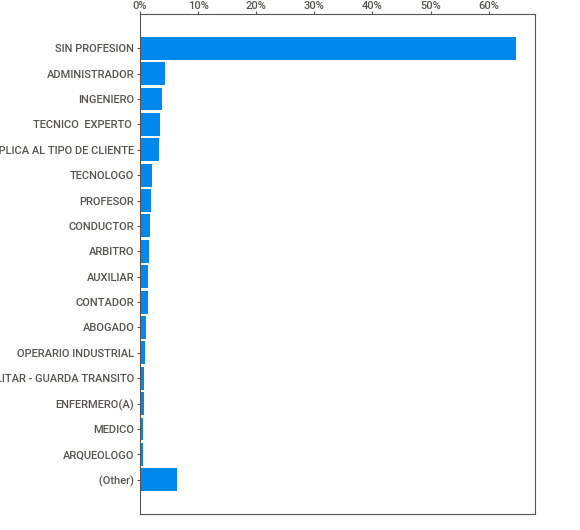
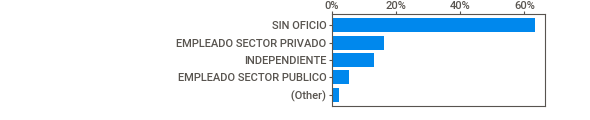
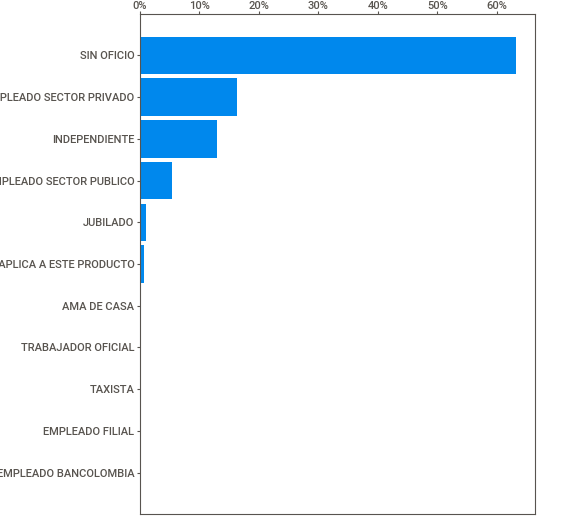
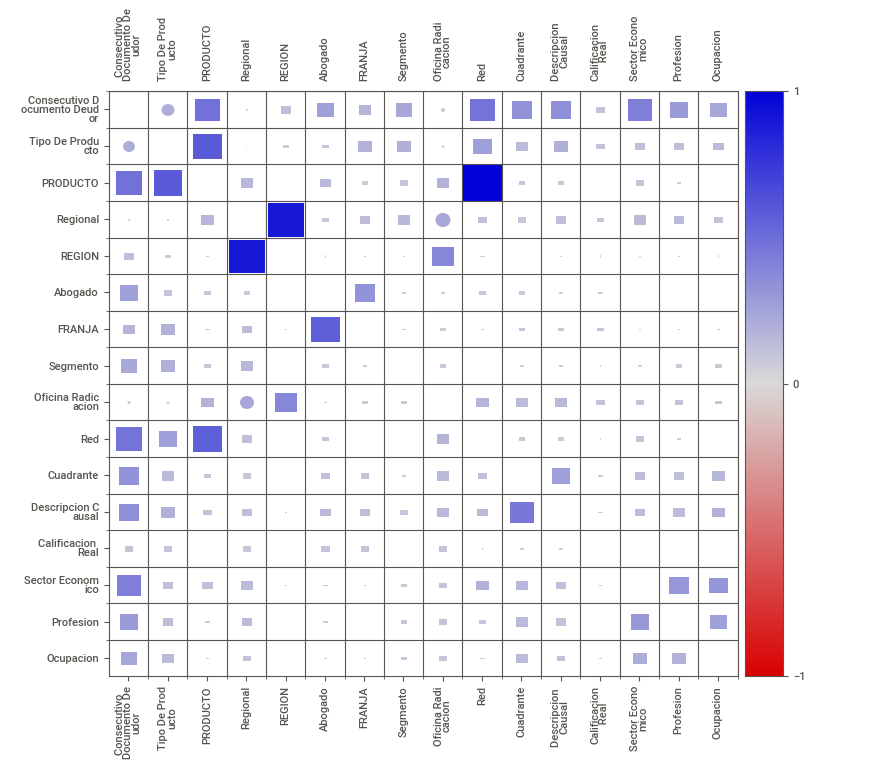
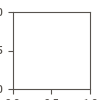

In [61]:
my_report.show_notebook()

In [57]:
print(data.columns)
print(data.dtypes)
print(data.shape)
V_categ=data[['Consecutivo Documento Deudor','Tipo De Producto','PRODUCTO','Regional','REGION','Abogado','FRANJA','Segmento','Oficina Radicacion','Red','Cuadrante','Descripcion Causal',
              'Calificacion Real', 'Profesion', 'Ocupacion']]

Index(['Consecutivo Documento Deudor', 'Nit', 'Nombres', 'Numero Documento',
       'Tipo De Producto', 'PRODUCTO', 'Valor Obligacion', 'Valor Vencido',
       'Regional', 'REGION', 'Abogado', 'Dias Mora', 'FRANJA',
       'Fecha Traslado Para Cobro', 'Fecha Ultima Facturacion', 'Segmento',
       'Oficina Radicacion', 'Red', 'Cuadrante', 'Descripcion Causal',
       'Calificacion Real', 'Fecha De Perfeccionamiento', 'Endeudamiento',
       'Rango endeudamiento', 'Sector Economico', 'Profesion', 'Ocupacion'],
      dtype='object')
Consecutivo Documento Deudor             int64
Nit                                      int64
Nombres                                float64
Numero Documento                       float64
Tipo De Producto                         int64
PRODUCTO                                object
Valor Obligacion                       float64
Valor Vencido                          float64
Regional                                 int64
REGION                                  

<Axes: >

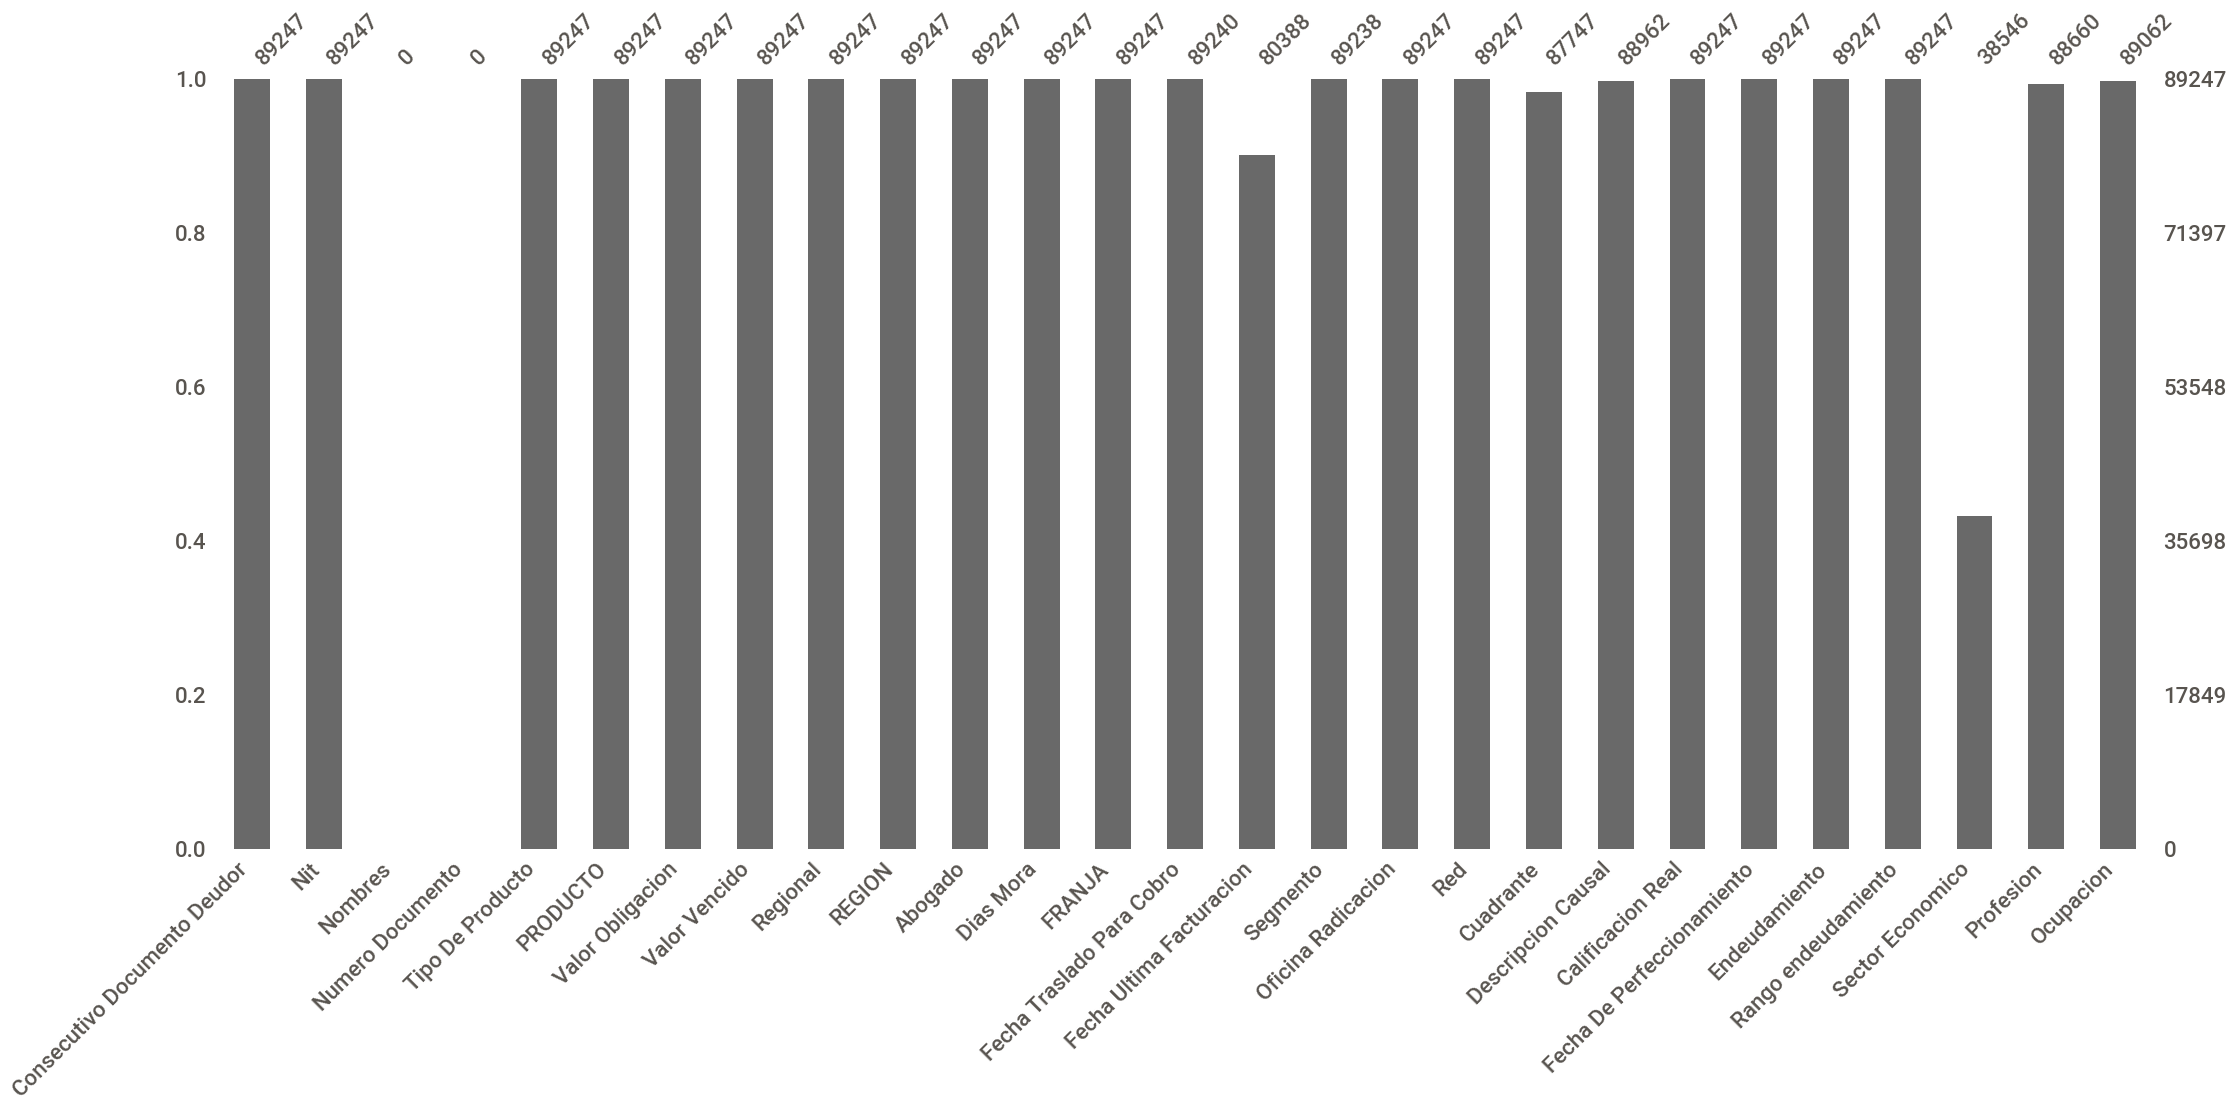

In [48]:
import missingno as msn
msn.bar(data)

In [ ]:
data.drop(columns="Nombres", axis=1, inplace=True)
data.drop(columns="Numero Documento", axis=1, inplace=True)
data.drop(columns="Sector Economico", axis=1, inplace=True)


In [ ]:
data.dropna(inplace=True)

<Axes: >

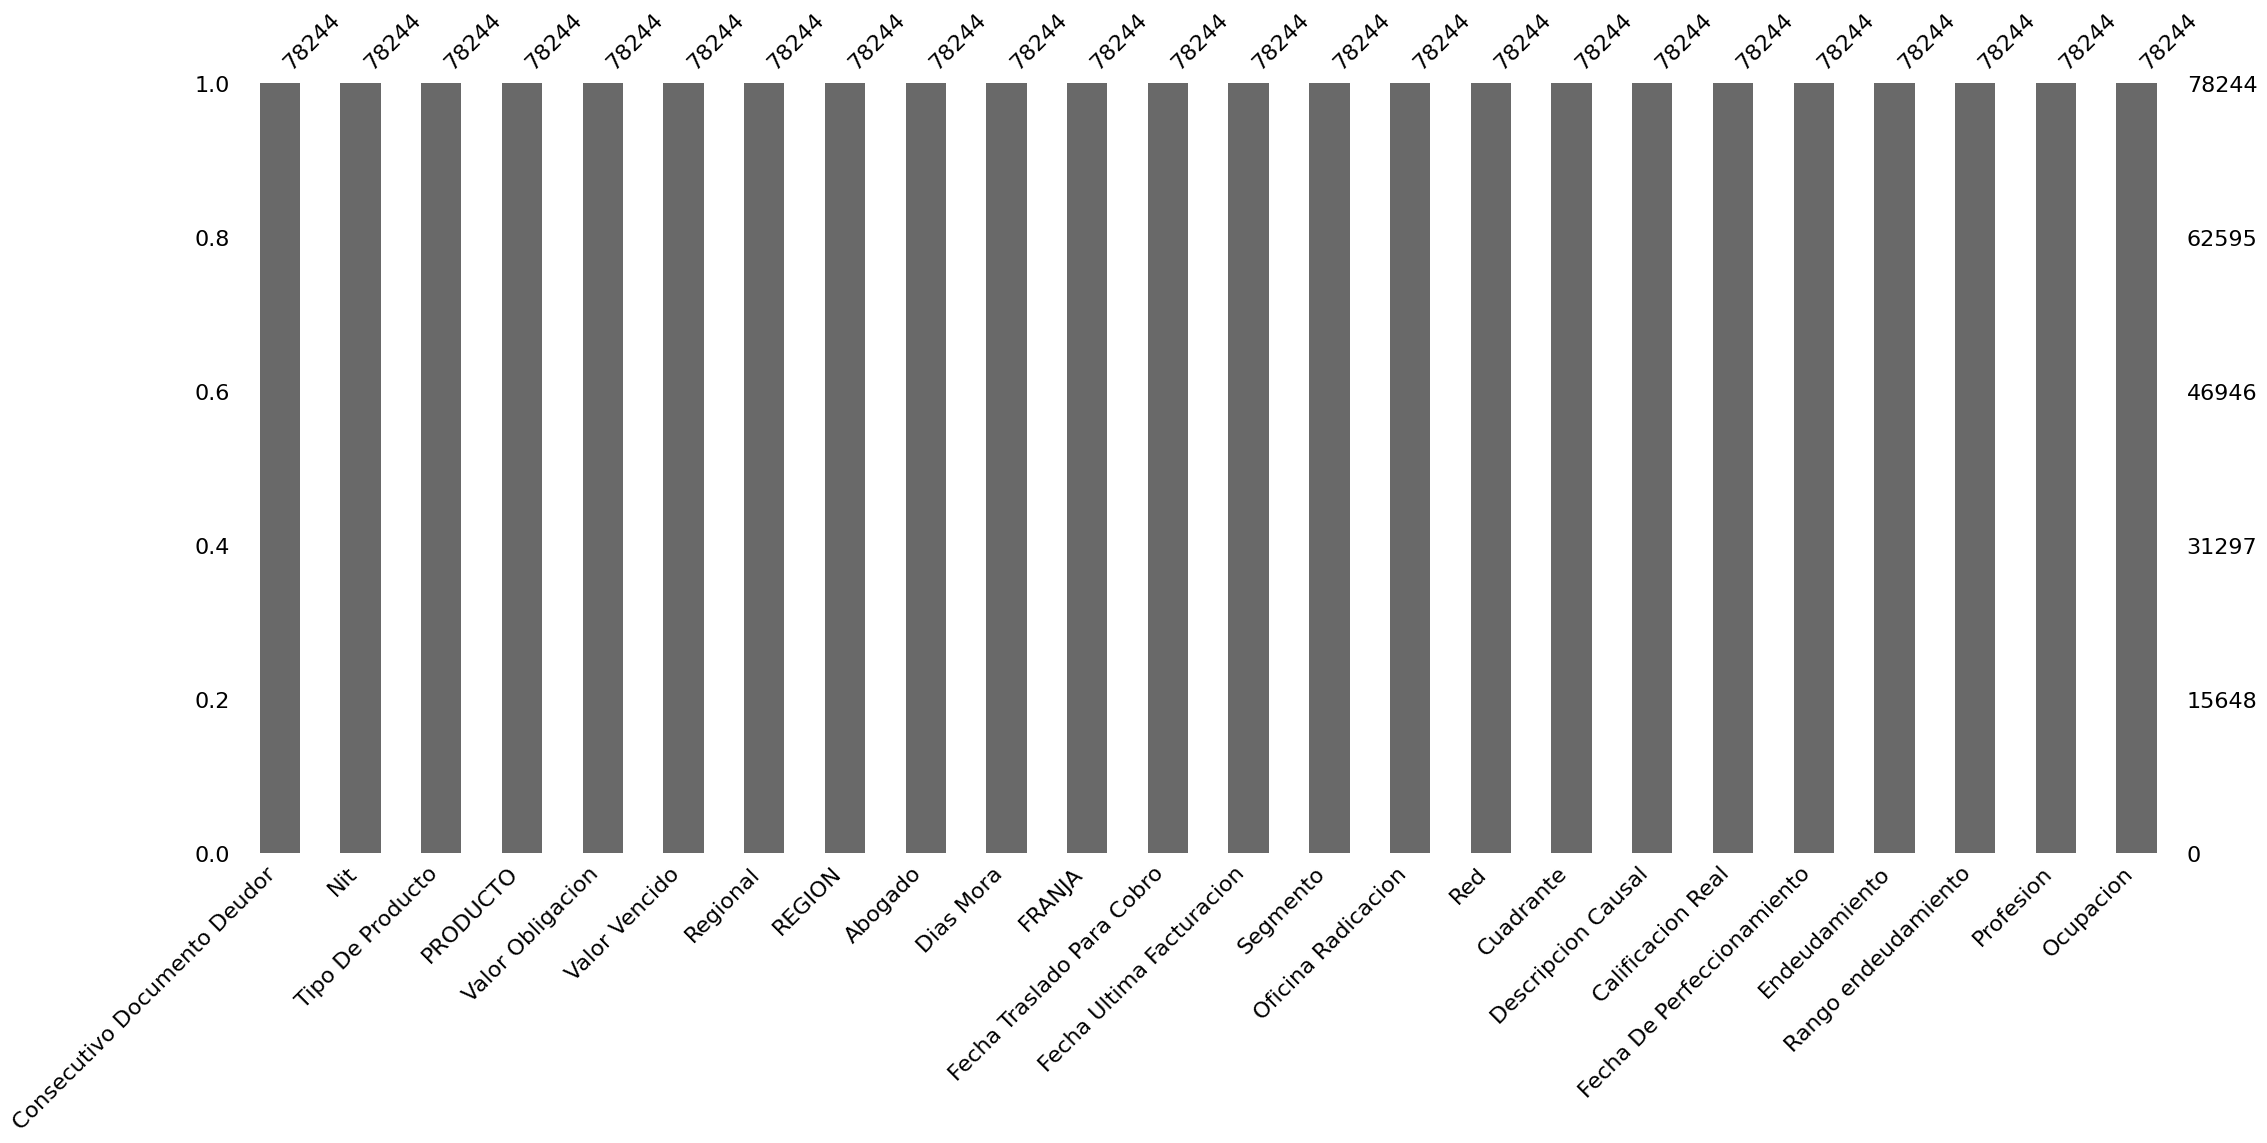

In [ ]:

msn.bar(data)

# Sección nueva

In [55]:
V_categ

,Consecutivo Documento Deudor,Tipo De Producto,PRODUCTO,Regional,REGION,Abogado,FRANJA,Segmento,Oficina Radicacion,Red,Cuadrante,Descripcion Causal,Calificacion Real,Sector Economico,Profesion,Ocupacion
0,28768192,3,TARJETAS DE CREDITO,2099,BOGOTA,109978,<30,PERSONAL PLUS,31,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CALAMIDAD,2,NaN,SIN PROFESION,SIN OFICIO
1,2712044,5,CONSUMO,2099,BOGOTA,109976,91-120,PERSONAL PLUS,461,1,SIN CUADRANTE,SIN CAUSAL DE MORA,3,NaN,SIN PROFESION,SIN OFICIO
2,13587837,3,TARJETAS DE CREDITO,3099,SUR,109978,31-60,PERSONAS,813,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,NaN,SIN PROFESION,JUBILADO
3,23479925,3,TARJETAS DE CREDITO,2099,BOGOTA,109978,61-90,PYMES,612,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,NaN,SIN PROFESION,SIN OFICIO
4,2712382,5,CONSUMO,6399,CENTRO,109978,31-60,PERSONAL PLUS,57,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,AGROPECUARIO,AGRICULTOR,TAXISTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89242,24892452,89,CONSUMO,3099,SUR,109976,91-120,PERSONAL PLUS,825,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESCUIDO,3,EDUCACION,PROFESOR,EMPLEADO SECTOR PUBLICO
89243,24485118,4,CONSUMO,3099,SUR,109976,91-120,PERSONAL PLUS,812,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESEMPLEADO TITULAR Y/O COTITULAR,3,NaN,SIN PROFESION,SIN OFICIO
89244,27364653,88,CONSUMO,3099,SUR,109976,91-120,PERSONAL PLUS,812,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESEMPLEADO TITULAR Y/O COTITULAR,3,NaN,SIN PROFESION,SIN OFICIO
89245,28482366,88,CONSUMO,3099,SUR,109976,91-120,PERSONAL PLUS,812,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESEMPLEADO TITULAR Y/O COTITULAR,3,NaN,SIN PROFESION,SIN OFICIO


In [ ]:
#data.drop(columns="Tipo De Producto", axis=1, inplace=True)

In [ ]:
#data.drop(columns="Dias Mora", axis=1, inplace=True) #eliminamos esta columna y nos quedamos solo con franja ya que en esta ultima se encuentra implica
#el numero de dias de mora pero ya esta categorizado

#Tablas de contingencia
a continuacion se

<Axes: xlabel='Rango endeudamiento', ylabel='Endeudamiento'>

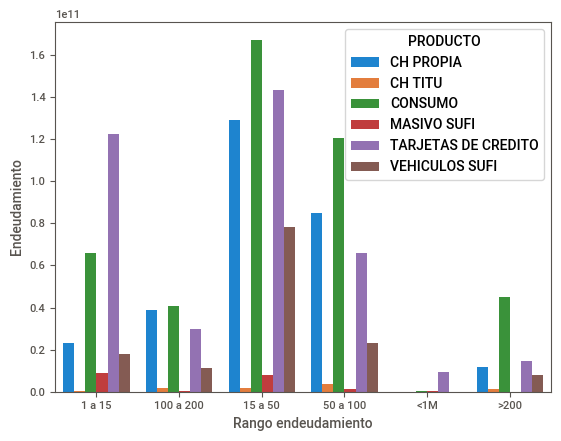

In [81]:
endeudamiento_cuadrante=data.groupby(["Rango endeudamiento", "PRODUCTO"]).aggregate({"PRODUCTO":"count", "Endeudamiento":"sum"})
endeudamiento_cuadrante.rename(columns=({"PRODUCTO":"Conteo Productos"}), inplace=True)
endeudamiento_cuadrante.reset_index(inplace=True)
sns.barplot(endeudamiento_cuadrante, x="Rango endeudamiento", y="Endeudamiento", hue="PRODUCTO")

In [79]:
pd.crosstab(data['Rango endeudamiento'], data["PRODUCTO"], margins=True)/89062*100

PRODUCTO,CH PROPIA,CH TITU,CONSUMO,MASIVO SUFI,TARJETAS DE CREDITO,VEHICULOS SUFI,All
Rango endeudamiento,,,,,,,
1 a 15,2.975455,0.013474,11.521187,2.464575,31.603827,2.728436,51.306955
100 a 200,0.335721,0.016842,0.334598,0.002246,0.250387,0.092071,1.031865
15 a 50,4.988660,0.067369,6.760459,0.327861,6.014911,3.332510,21.491770
50 a 100,1.412499,0.055018,1.923379,0.017965,1.081269,0.384002,4.874133
<1M,0.030316,0.000000,1.346253,0.490669,19.233792,0.123509,21.224540
>200,0.048281,0.004491,0.148211,0.000000,0.049404,0.028070,0.278458
All,9.790932,0.157194,22.034089,3.303317,58.233590,6.688599,100.207720


<Axes: xlabel='Rango endeudamiento', ylabel='Endeudamiento'>

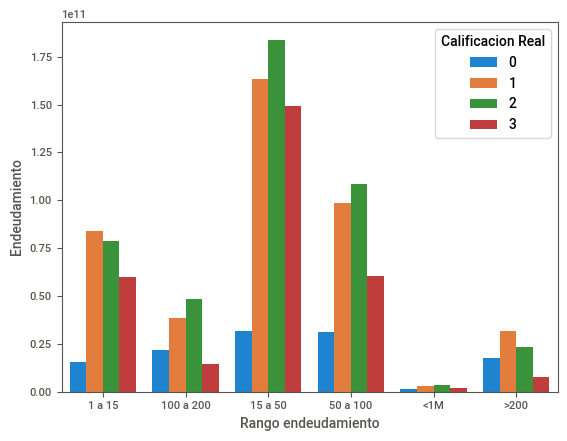

In [86]:
endeudamiento_cuadrante=data.groupby(["Rango endeudamiento", "Calificacion Real"]).aggregate({"Calificacion Real":"count", "Endeudamiento":"sum"})
endeudamiento_cuadrante.rename(columns=({"Calificacion Real":"Conteo Productos"}), inplace=True)
endeudamiento_cuadrante.reset_index(inplace=True)
sns.barplot(endeudamiento_cuadrante, x="Rango endeudamiento", y="Endeudamiento", hue="Calificacion Real")

In [ ]:
pd.crosstab(data['Rango endeudamiento'], data["Calificacion Real"], margins=True)/89062*100

Exception ignored in: <function tqdm.__del__ at 0x78a3bee4cd30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1148, in __del__
    def __del__(self):
KeyboardInterrupt: 


In [ ]:
print(data["Rango endeudamiento"].value_counts())
print(data["PRODUCTO"].value_counts())
print(data["REGION"].value_counts())

1 a 15       41777
<1M          18485
15 a 50      14248
50 a 100      2950
100 a 200      594
>200           190
Name: Rango endeudamiento, dtype: int64
TARJETAS DE CREDITO    50846
CONSUMO                19294
VEHICULOS SUFI          5514
MASIVO SUFI             2589
CH PROPIA                  1
Name: PRODUCTO, dtype: int64
BOGOTA       23537
ANTIOQUIA    15907
CENTRO       13935
SUR          13235
CARIBE       11630
Name: REGION, dtype: int64


In [ ]:
data["PRODUCTO"].value_counts()

TARJETAS DE CREDITO    50846
CONSUMO                19294
VEHICULOS SUFI          5514
MASIVO SUFI             2589
CH PROPIA                  1
Name: PRODUCTO, dtype: int64

In [51]:
pd.crosstab(data['Rango endeudamiento'], data["PRODUCTO"], margins=True)/89062*100

PRODUCTO,CH PROPIA,CH TITU,CONSUMO,MASIVO SUFI,TARJETAS DE CREDITO,VEHICULOS SUFI,All
Rango endeudamiento,,,,,,,
1 a 15,2.975455,0.013474,11.521187,2.464575,31.603827,2.728436,51.306955
100 a 200,0.335721,0.016842,0.334598,0.002246,0.250387,0.092071,1.031865
15 a 50,4.988660,0.067369,6.760459,0.327861,6.014911,3.332510,21.491770
50 a 100,1.412499,0.055018,1.923379,0.017965,1.081269,0.384002,4.874133
<1M,0.030316,0.000000,1.346253,0.490669,19.233792,0.123509,21.224540
>200,0.048281,0.004491,0.148211,0.000000,0.049404,0.028070,0.278458
All,9.790932,0.157194,22.034089,3.303317,58.233590,6.688599,100.207720


In [56]:
V_num=data[['Valor Obligacion','Endeudamiento','Valor Vencido','Dias Mora']]
V_num

,Valor Obligacion,Endeudamiento,Valor Vencido,Dias Mora
0,5637605.0,5637605.00,152093.0,30
1,40584.0,40584.00,40584.0,110
2,2786178.0,7747280.00,547088.0,60
3,5904653.0,5904653.00,1455631.0,90
4,2221125.0,2221125.00,2221125.0,48
...,...,...,...,...
89242,2048599.0,37088351.03,284377.0,95
89243,33835903.0,45757681.00,2790040.0,104
89244,1540300.0,45757681.00,1511822.0,107
89245,3954718.0,45757681.00,609495.0,107


In [72]:
my_report=sv.analyze(V_num)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



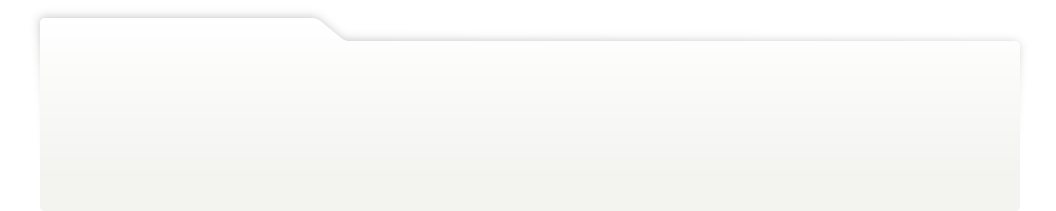
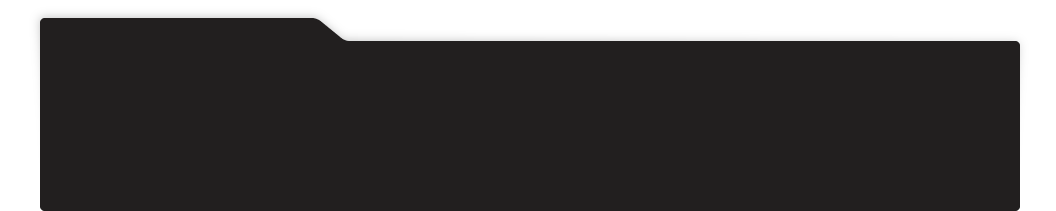
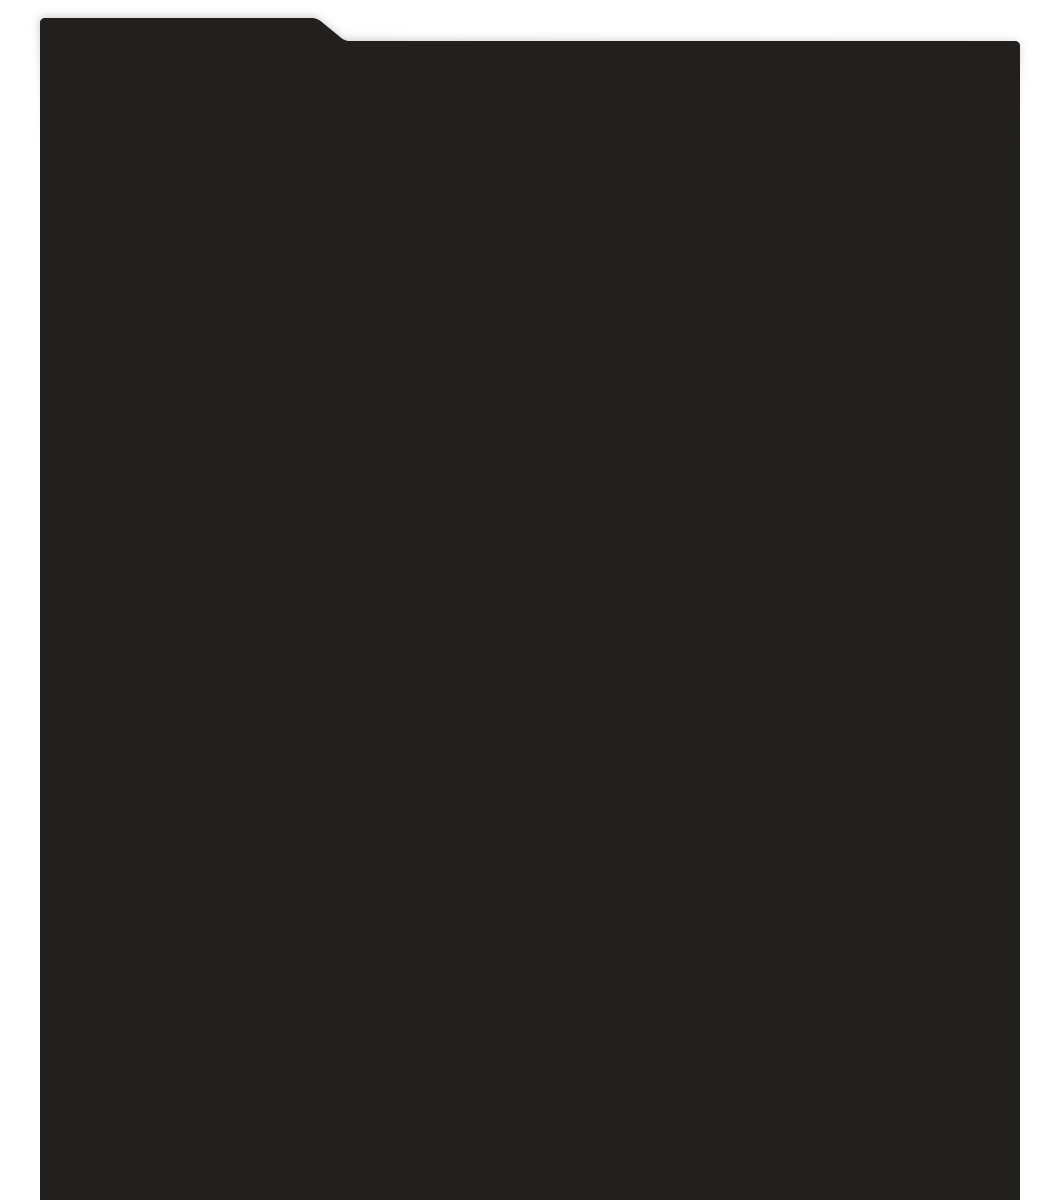
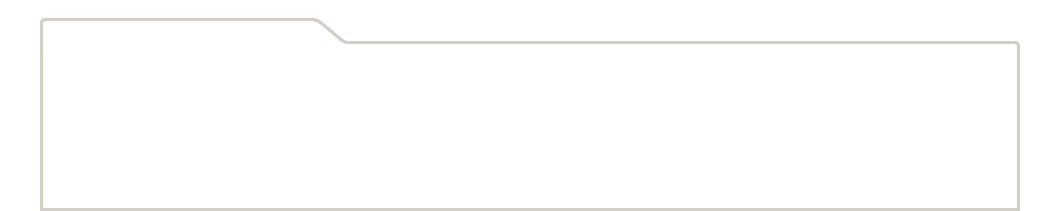
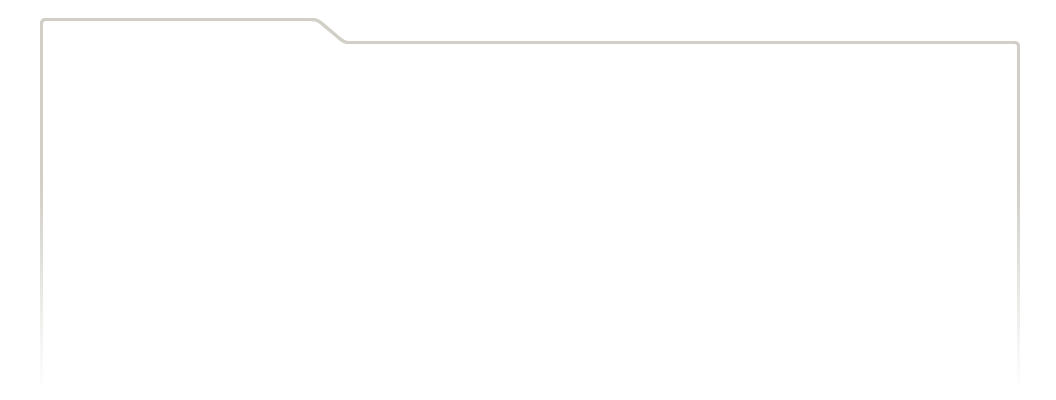
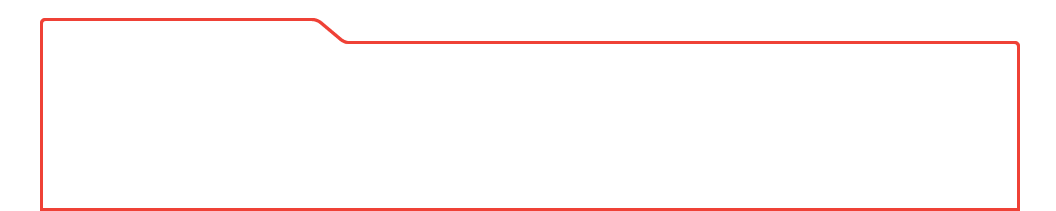
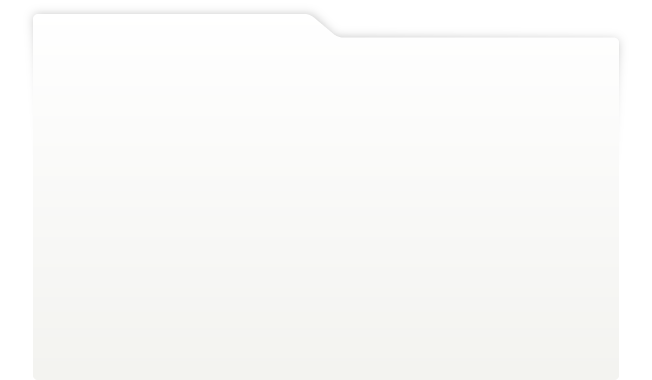
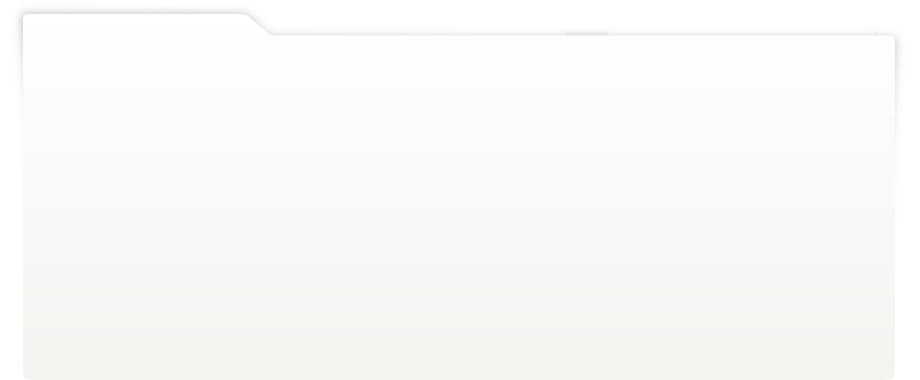
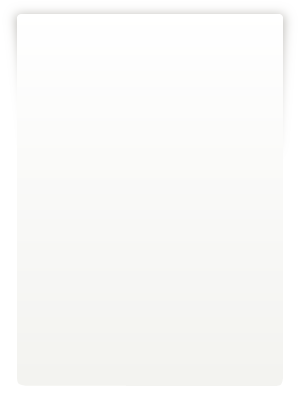
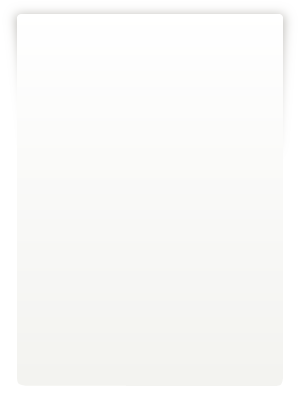
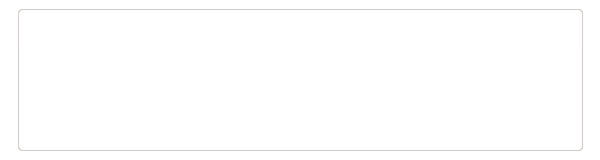
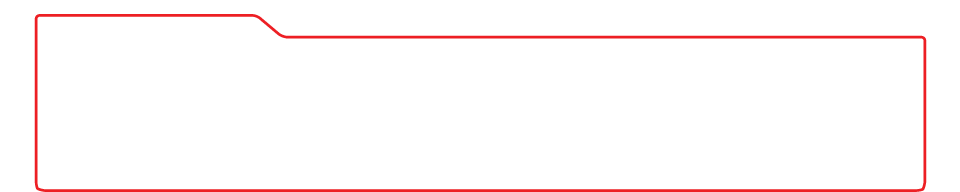
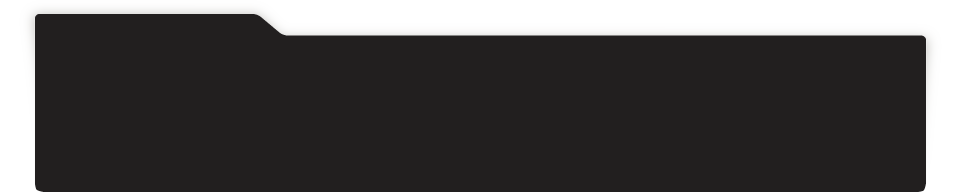
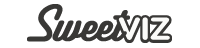
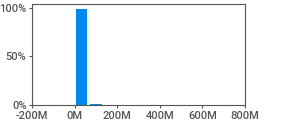
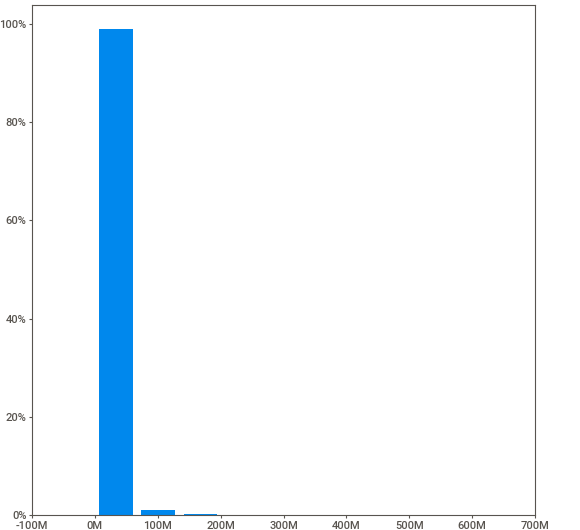
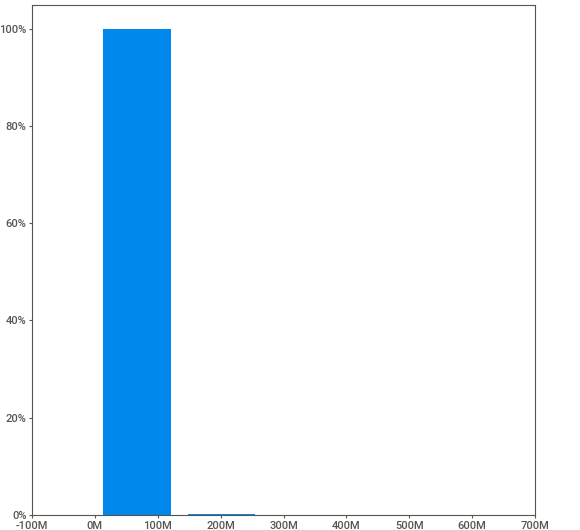
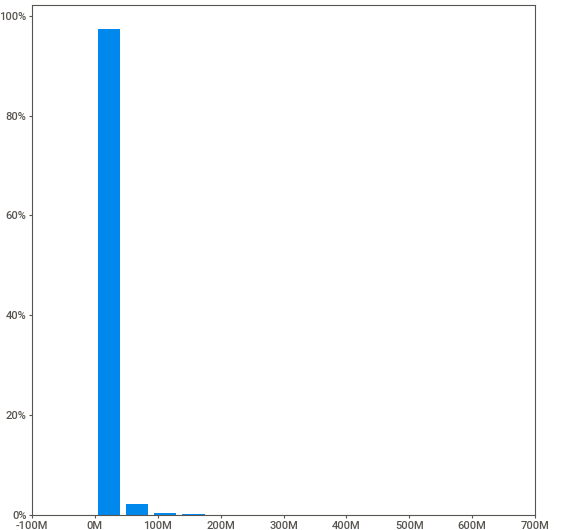
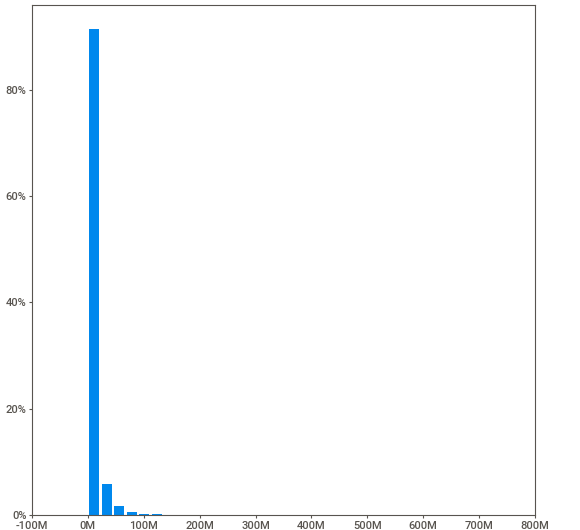
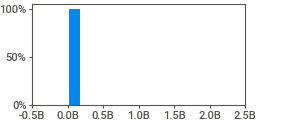
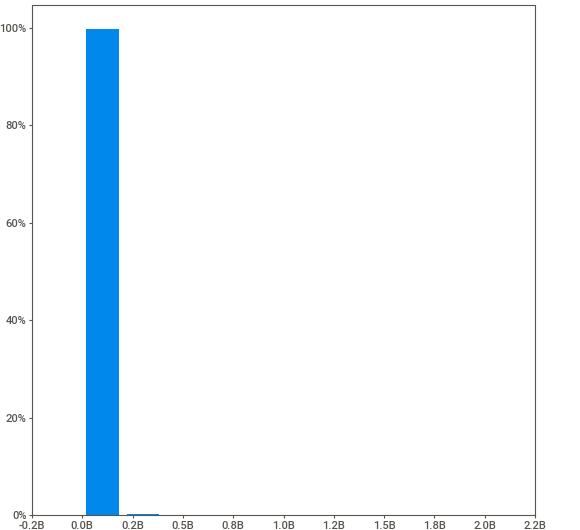
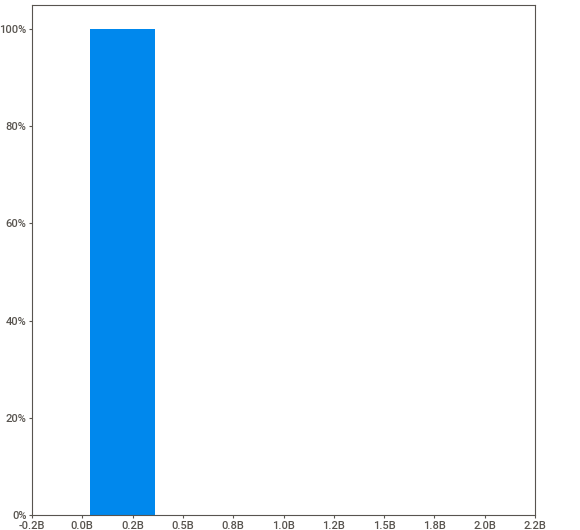
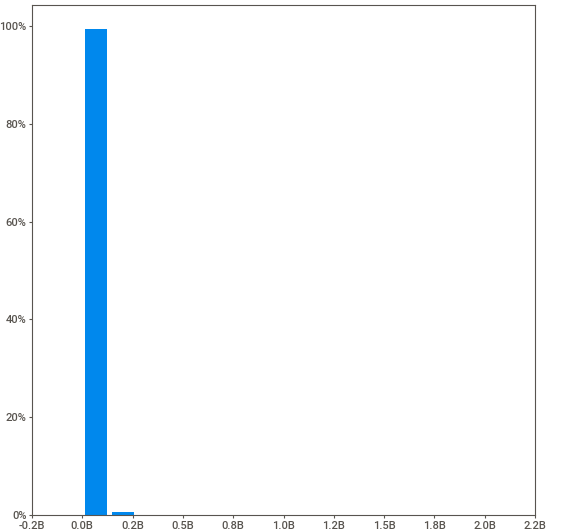
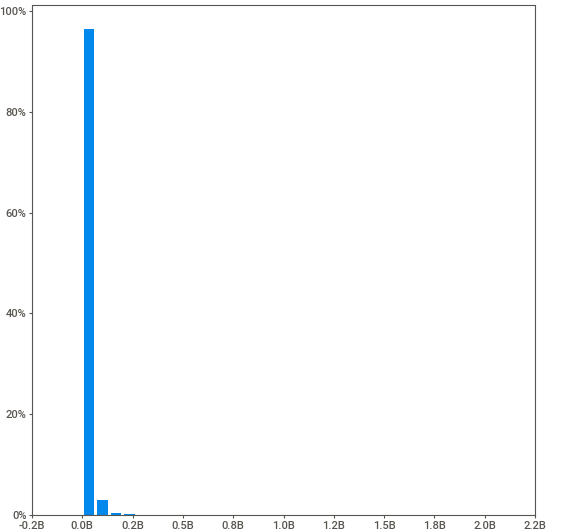
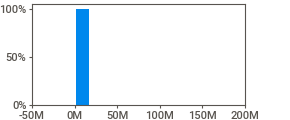
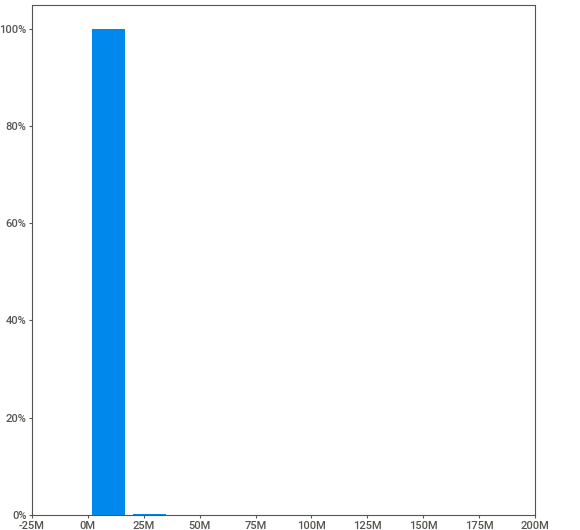
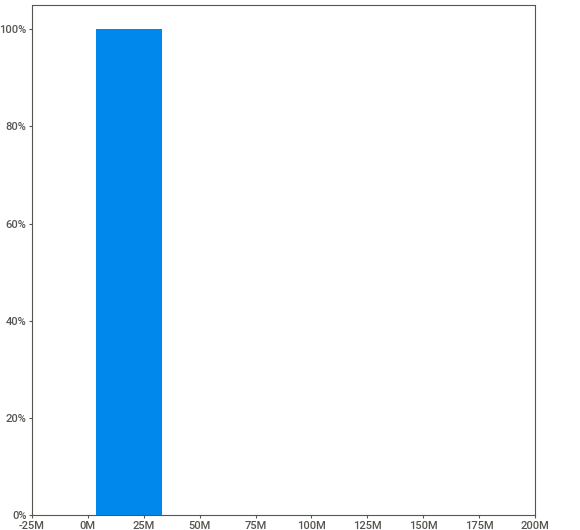
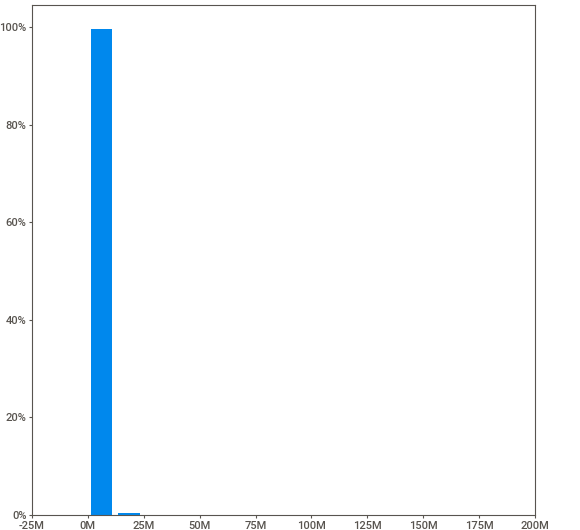
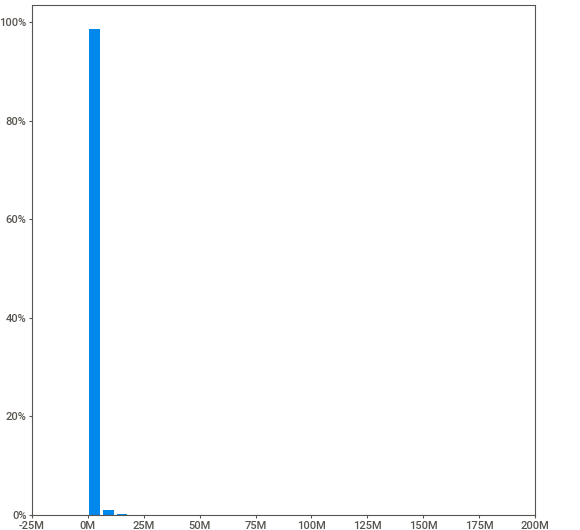
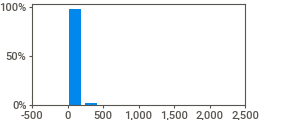
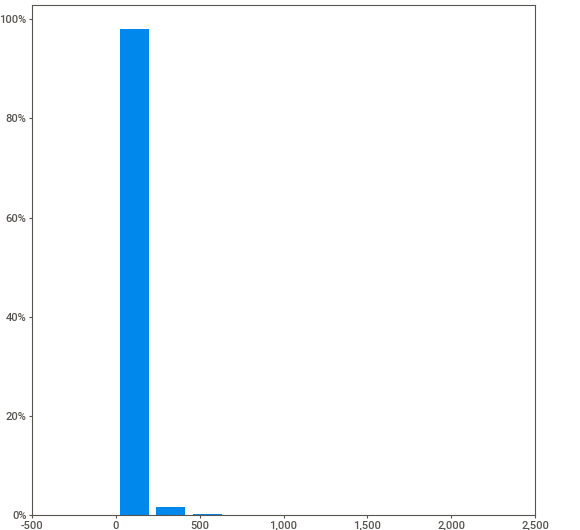
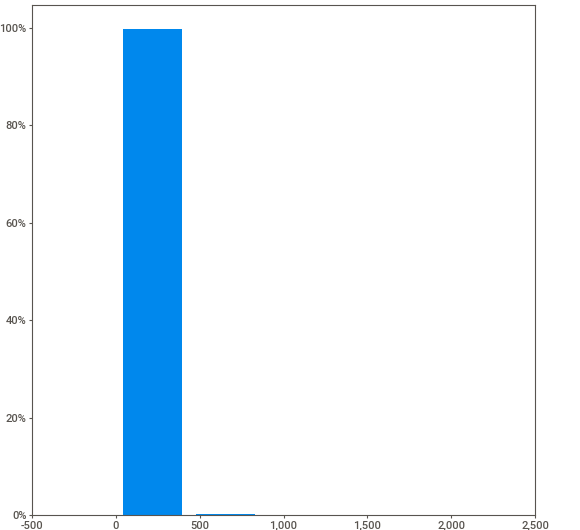
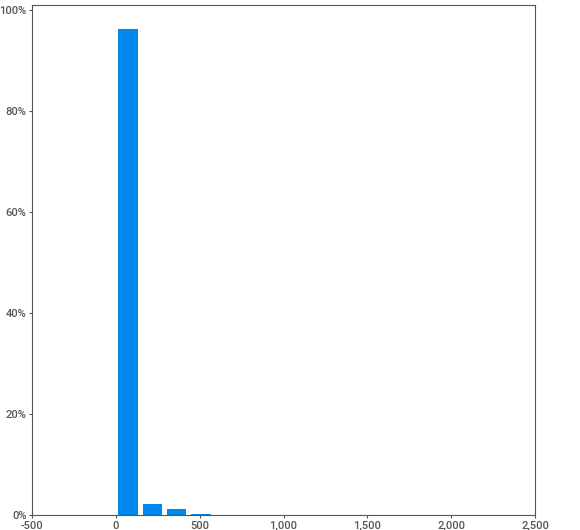
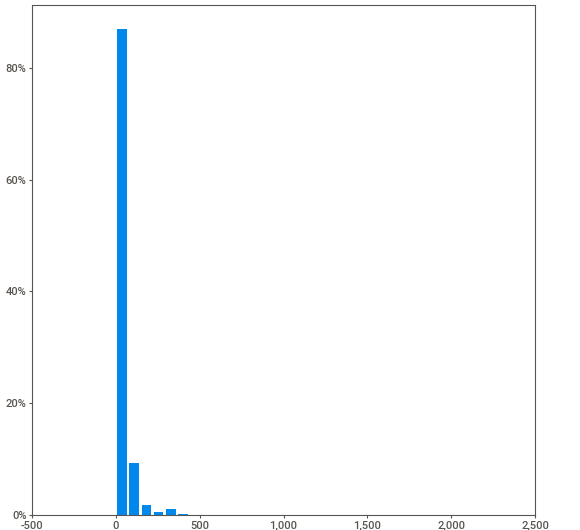
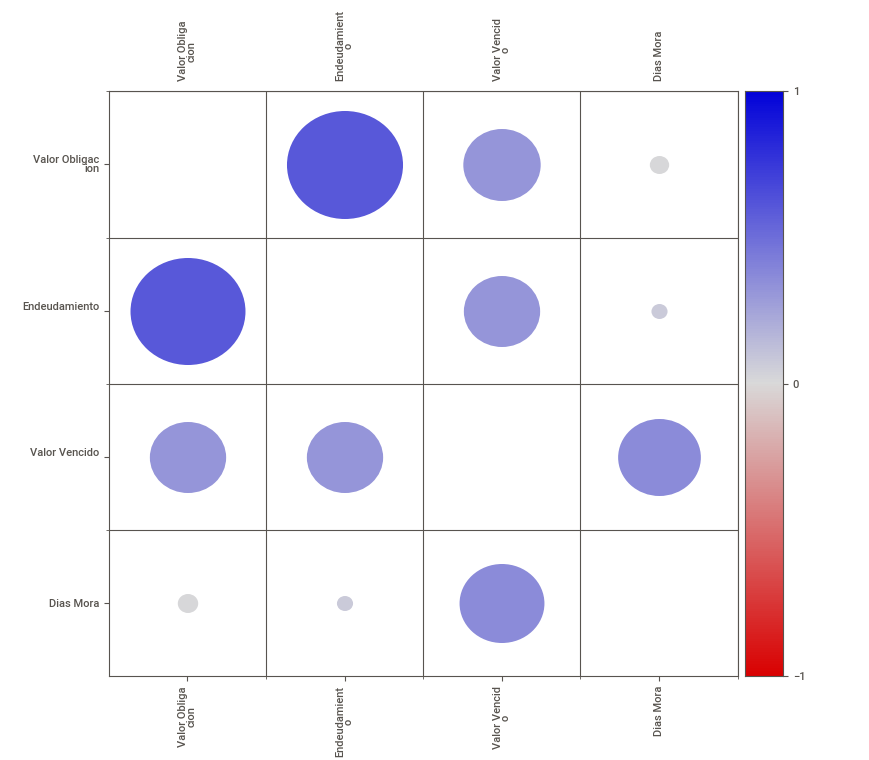
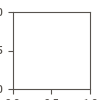

In [73]:
my_report.show_notebook()

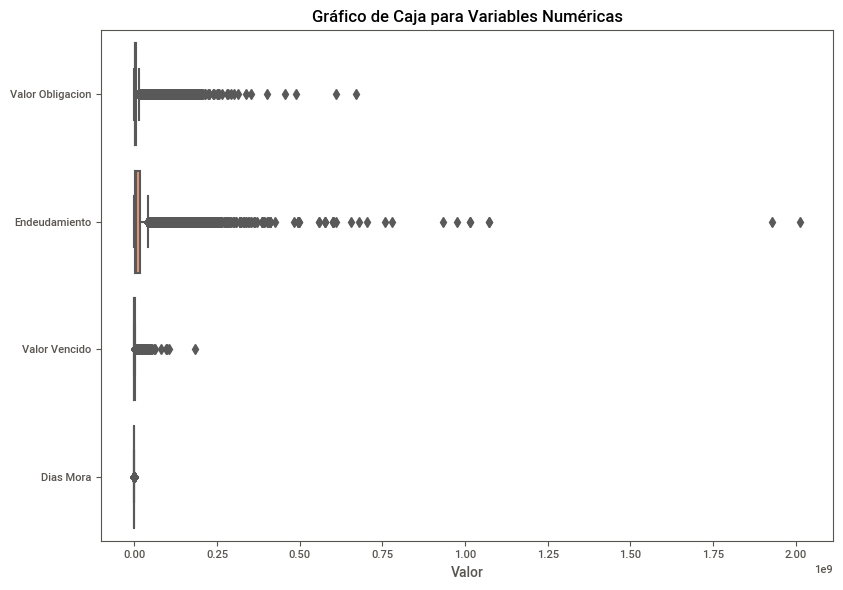

In [64]:
plt.figure(figsize=(16, 6))  # Ajusta el tamaño de la figura

# Gráfico de caja
plt.subplot(1, 2, 1)  # Subplot 1 de 2 columnas
sns.boxplot(data=V_num, orient="h", palette="Set2")
plt.title("Gráfico de Caja para Variables Numéricas")
plt.xlabel("Valor")



plt.tight_layout()
plt.show()

In [67]:
# Calcular el rango intercuartil (IQR) para cada columna
Q1 = V_num.quantile(0.25)
Q3 = V_num.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Encontrar valores atípicos en cada columna
valores_atipicos = ((V_num < limite_inferior) | (V_num > limite_superior)).any(axis=1)

# Filtrar las filas con valores atípicos
filas_con_valores_atipicos = V_num[valores_atipicos]

# Imprimir las filas con valores atípicos
print(filas_con_valores_atipicos)


       Valor Obligacion  Endeudamiento  Valor Vencido  Dias Mora
1               40584.0       40584.00        40584.0        110
3             5904653.0     5904653.00      1455631.0         90
4             2221125.0     2221125.00      2221125.0         48
6             1527464.0     1574242.00      1527464.0         60
12             874684.0      874684.00       874684.0        120
...                 ...            ...            ...        ...
89242         2048599.0    37088351.03       284377.0         95
89243        33835903.0    45757681.00      2790040.0        104
89244         1540300.0    45757681.00      1511822.0        107
89245         3954718.0    45757681.00       609495.0        107
89246         2172488.0    45757681.00       350295.0        107

[27182 rows x 4 columns]


In [74]:
limite_superior

Valor Obligacion    13383057.75
Endeudamiento       40497104.25
Valor Vencido        1371839.25
Dias Mora                 76.00
dtype: float64

In [75]:
V_num

,Valor Obligacion,Endeudamiento,Valor Vencido,Dias Mora
0,5637605.0,5637605.00,152093.0,30
1,40584.0,40584.00,40584.0,110
2,2786178.0,7747280.00,547088.0,60
3,5904653.0,5904653.00,1455631.0,90
4,2221125.0,2221125.00,2221125.0,48
...,...,...,...,...
89242,2048599.0,37088351.03,284377.0,95
89243,33835903.0,45757681.00,2790040.0,104
89244,1540300.0,45757681.00,1511822.0,107
89245,3954718.0,45757681.00,609495.0,107


In [76]:
for var in V_num.columns:
  # Calcular el rango intercuartil (IQR) para cada columna
  Q1 = data[var].quantile(0.25)
  Q3 = data[var].quantile(0.75)
  IQR = Q3 - Q1

  # Definir los límites para valores atípicos
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  data[f'atipico_{var}'] = np.where(data[var] < limite_inferior, 1, 0)
  data.loc[(data[var] > limite_superior), f'atipico_{var}'] = 1

In [77]:
data.head()

,Consecutivo Documento Deudor,Nit,Nombres,Numero Documento,Tipo De Producto,PRODUCTO,Valor Obligacion,Valor Vencido,Regional,REGION,...,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion,atipico_Valor Obligacion,atipico_Endeudamiento,atipico_Valor Vencido,atipico_Dias Mora
0,28768192,18,NaN,NaN,3,TARJETAS DE CREDITO,5637605.0,152093.0,2099,BOGOTA,...,1978-12-06,5637605.0,1 a 15,NaN,SIN PROFESION,SIN OFICIO,0,0,0,0
1,2712044,22,NaN,NaN,5,CONSUMO,40584.0,40584.0,2099,BOGOTA,...,2015-03-11,40584.0,<1M,NaN,SIN PROFESION,SIN OFICIO,0,0,0,1
2,13587837,23,NaN,NaN,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,...,2003-03-27,7747280.0,1 a 15,NaN,SIN PROFESION,JUBILADO,0,0,0,0
3,23479925,46,NaN,NaN,3,TARJETAS DE CREDITO,5904653.0,1455631.0,2099,BOGOTA,...,1990-09-01,5904653.0,1 a 15,NaN,SIN PROFESION,SIN OFICIO,0,0,1,1
4,2712382,92,NaN,NaN,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,...,2015-05-12,2221125.0,1 a 15,AGROPECUARIO,AGRICULTOR,TAXISTA,0,0,1,0


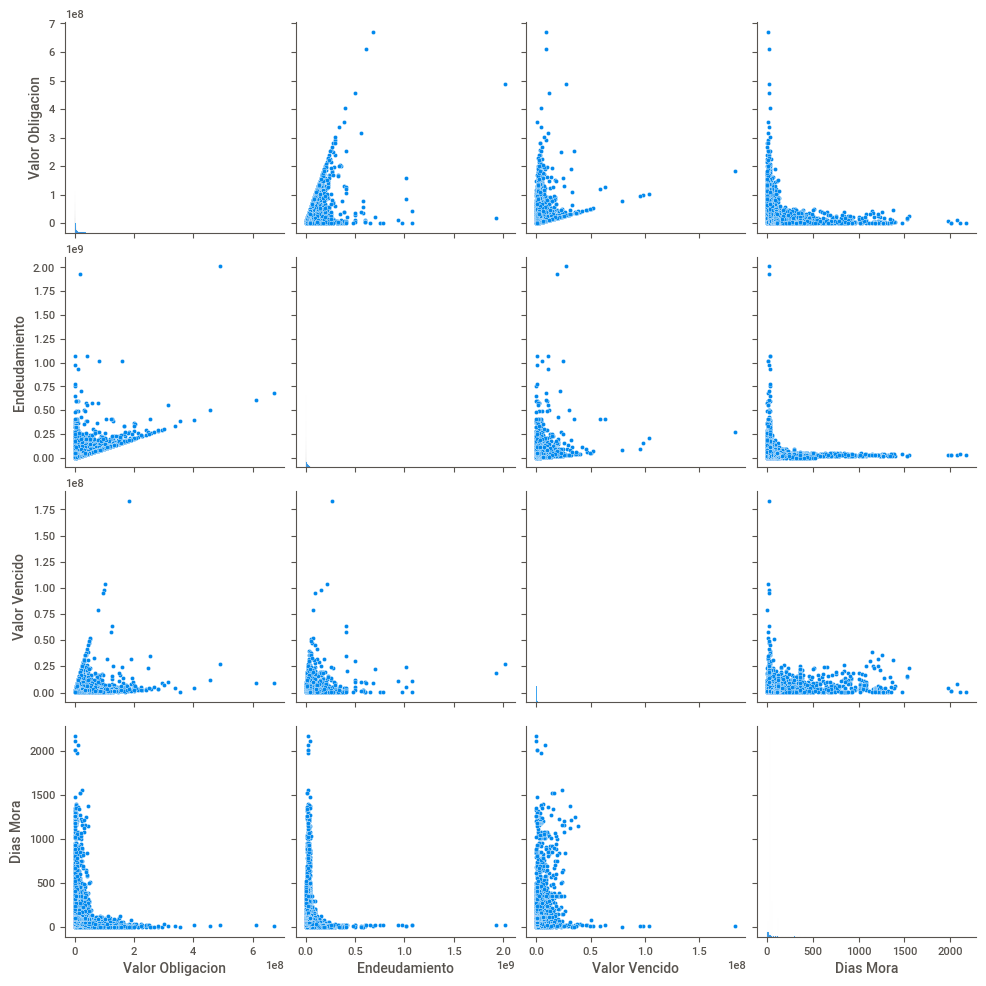

In [70]:
from seaborn.axisgrid import pairplot
pairplot(V_num)

In [71]:
data['Dias Mora'].describe()

count    89247.000000
mean        47.099320
std         70.105525
min          1.000000
25%         26.000000
50%         30.000000
75%         46.000000
max       2175.000000
Name: Dias Mora, dtype: float64

In [33]:
data['Valor Obligacion'].describe()

count    7.824400e+04
mean     4.424137e+06
std      9.314002e+06
min      1.804400e+04
25%      6.864612e+05
50%      1.604043e+06
75%      3.929639e+06
max      4.894150e+08
Name: Valor Obligacion, dtype: float64

In [ ]:
plt.boxplot(data['Valor Obligacion'])

In [ ]:
plt.boxplot(data['Dias Mora'])

In [ ]:
## se elimina columna region ya que en el codigo "regional" la columba region se encuentra implicito y evitar problemas de multicolinealidad

data.drop(columns="REGION", axis=1, inplace=True)

In [ ]:
data["Descripcion Causal"].value_counts()
#que hacer con un desbalance de datos tan grande?

In [ ]:
# Especificamos tamaño de la figura
plt.figure(figsize=(20,10))

#Ejecutamos la correlación entre las variables
correlacion = data.corr()

#Gráfica de correlación heatmap

mask = np.triu(np.ones_like(correlacion, dtype=np.bool))
heatmap = sns.heatmap(correlacion, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Gráfico de correlación', fontdict={'fontsize':18}, pad=16);

In [ ]:
print(data.dtypes)

In [ ]:
PRODUCTO = pd.get_dummies(data['PRODUCTO'],drop_first=True) ## por que es el drop first?

In [ ]:
FRANJA = pd.get_dummies(data['FRANJA'],drop_first=True)

In [ ]:
Segmento = pd.get_dummies(data['Segmento'],drop_first=True)

In [ ]:
Cuadrante = pd.get_dummies(data['Cuadrante'],drop_first=True)

In [ ]:
Descripcion_Causal = pd.get_dummies(data['Descripcion Causal'],drop_first=True)

In [ ]:
#eliminamos las columnas de las que obtuvimos las dummies

In [ ]:
data.drop(['PRODUCTO','FRANJA','Segmento','Cuadrante','Descripcion Causal',],axis=1,inplace=True)

In [ ]:
data.dtypes

In [ ]:
data["Fecha De Perfeccionamiento"]=data["Fecha De Perfeccionamiento"].dt.month

In [ ]:
data[data["Nit"].duplicated()]

In [ ]:
data1 = pd.concat([data,PRODUCTO,FRANJA,Segmento,Cuadrante,Descripcion_Causal,],axis=1)## nuevo dataset con dummies


In [ ]:
X = list(Train.columns)
Y = list(filter(lambda t: t not in ['Attrition'], m))